# Table of Contents

<a class="anchor" id="top"></a>

** **

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    
   2.1 [Incoherencies](#2.1-Incoherencies) <br>
   
   &emsp; 2.1.1 [Address Identified Incoherencies](#2.1.1-Address-Identified-Incoherencies) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
    
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [Data Type Conversions](#3.2.1-Data-Type-Conversions) <br>
   
   &emsp; 3.2.2 [Encoding](#3.2.2-Encoding) <br>
   
   &emsp; 3.2.3 [Other Transformations](#3.2.3-Other-Transformations) <br>
    
   &emsp; 3.2.4 [Unique Feature-Pair Analysis](#3.2.4-Unique-Feature-Pair-Analysis) <br> 

   3.3 [Train-Test Split](#3.3-Train-Test-Split) <br>
   
   3.4 [Missing Values](#3.4-Missing-Values) <br>
    
   3.5 [Outliers](#3.5-Outliers) <br>

   3.6 [Visualisations](#3.6-Visualisations) <br><br>
   
4. [Feature Selection](#4.-Feature-Selection) 

    4.1 [Scaling](#4.1-Scaling) <br>
    
    4.2 [Filter Based Methods](#4.2-Filter-Based-Methods) <br>

    4.3 [Wrapper Methods](#4.3-Wrapper-Methods) <br>
    
    4.4 [Embedded Methods](#4.4-Embedded-Methods) <br><br>
    
5. [Export](#5.-Export)


# Introduction

This project aims to assist the New York Workers’ Compensation Board (WCB) in automating the decision-making process for classifying claims by predicting the Claim Injury Type. The task involves creating and optimizing machine learning models using historical data from claims assembled between 2020 and 2022.

Data Scientist Manager: António Oliveira, **20211595**

Data Scientist Senior: Tomás Ribeiro, **20240526**

Data Scientist Junior: Gonçalo Pacheco, **20240695**

Data Analyst Senior: Gonçalo Custódio, **20211643**

Data Analyst Junior: Ana Caleiro, **20240696**


** **

# 1. Importing Libraries & Data
In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Data Profiling 
# from ydata_profiling import ProfileReport

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import visualisations as v

# Preprocessing Functions
import preproc as p

# Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Train-Test Split
from sklearn.model_selection import train_test_split

# Scaling Techniques
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# Feature Selection Libraries
from sklearn.feature_selection import VarianceThreshold
import feature_selection as fs

# Models for Recursive Feature Elimination (RFE)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Label Encoder 
# from sklearn.preprocessing import LabelEncoder

# Display Settings
pd.set_option('display.max_columns', None)

# Song Playing Function 
# import play_song as song

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')

# Print the first 3 rows of the training data
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis
This section is dedicated to conducting an in-depth Exploratory Data Analysis (EDA) to comprehend the dataset’s structure, statistical properties, and inherent patterns. Through systematic analysis, we aim to identify key relationships among variables, detect potential anomalies, and evaluate the completeness and quality of the data. The findings from this stage serve as a critical foundation for subsequent data preprocessing and model development, ensuring that informed and data-driven decisions guide the overall analytical workflow.

<a href="#top">Top &#129033;</a>

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

In [4]:
# The "include='object'" argument limits the description to only categorical data types.
# Transpose the result (.T) to display statistics in a more readable format with rows as columns.
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [5]:
# .describe provides statistical summaries for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [6]:
# Check the dimensions of the dataset (number of rows and columns)
df.shape

(593471, 32)

In [7]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

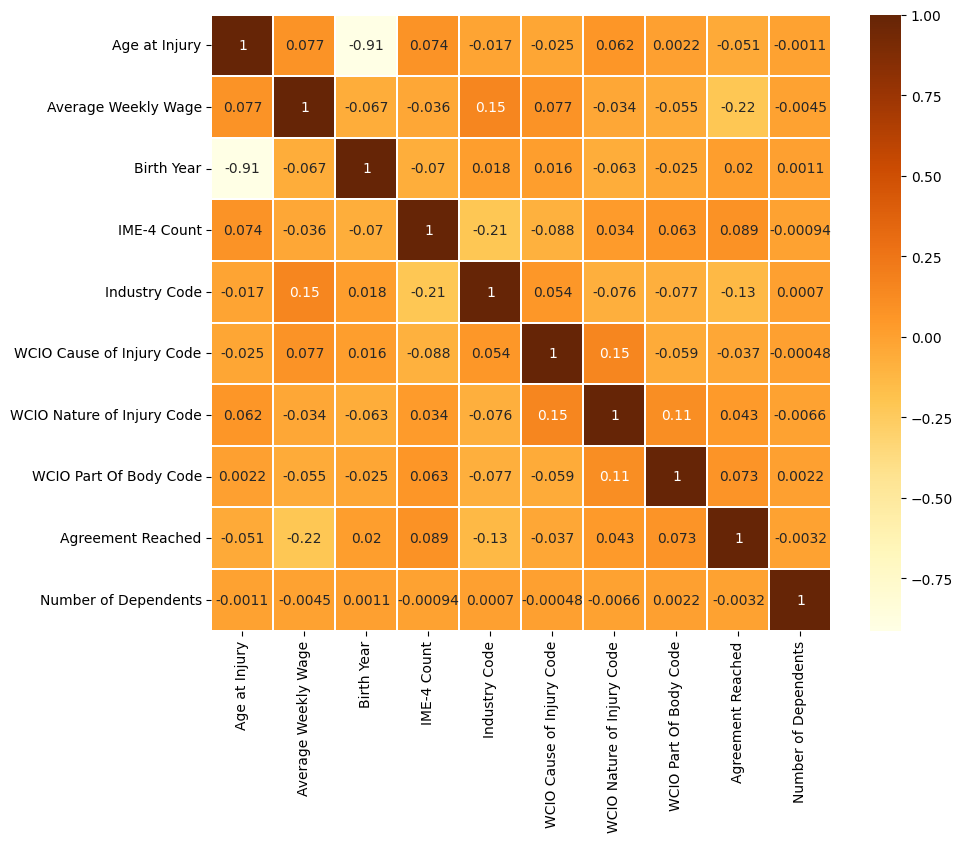

In [8]:
# Drop column that is always missing
temp = df.drop('OIICS Nature of Injury Description', axis=1)

# Remove rows with missing values
temp = temp.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1)
plt.show()

**Unique Values**

In [9]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 20:
        
        # Print unique values and count for columns with fewer than 20 unique values
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Number of unique values: 3

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Number of unique values: 2

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of unique values: 8

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of unique values: 8

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
Number of unique values: 2

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
Number of unique values: 8

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Number of unique values: 4

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK'

## 2.1 Incoherencies
Incoherencies, can compromise the integrity of the analysis and the performance of machine learning models. By systematically identifying and addressing these issues, we aim to enhance data quality and ensure the dataset is both accurate and reliable for subsequent preprocessing and modeling stages.

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [10]:
# Filter the DataFrame for rows where 'Age at Injury' is less than 18
df[df['Age at Injury'] < 18]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5394788,2019-12-23,16.0,N,2020-01-02,N,0.0,2003.0,2020-01-02,NaN,PENNSYLVANIA MANUFACTURERS',1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,32.0,ON ICE OR SNOW,40.0,LACERATION,14.0,EYE(S),11776,0.0,Not Work Related,4.0
5394093,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
5394068,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
5393794,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164933,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
6164795,2022-08-20,17.0,N,2022-12-30,N,0.0,2005.0,2022-12-30,NaN,SEQUOIA INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,SCHOHARIE,N,BINGHAMTON,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,12149,0.0,Not Work Related,5.0
6164931,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1. CANCELLED,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0


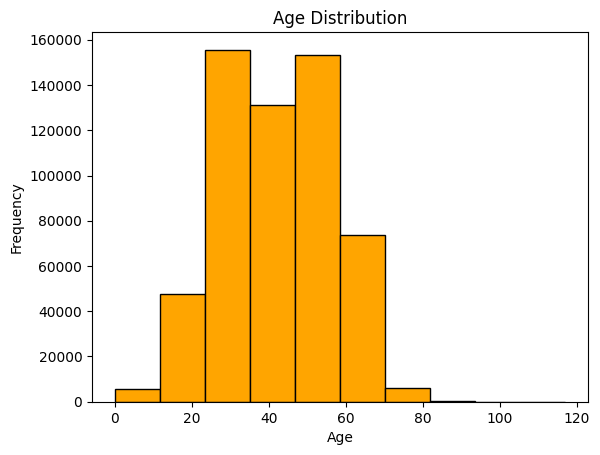

In [11]:
# Plot histogram for the 'Age at Injury' column
v.plot_histogram(df['Age at Injury'], 
                 'Age',         # x-axis label
                 'Frequency',   # y-axis label
                 'Age Distribution')  # Title of the plot

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [12]:
# Filter the DataFrame for rows where 'Birth Year' is earlier than 1800
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


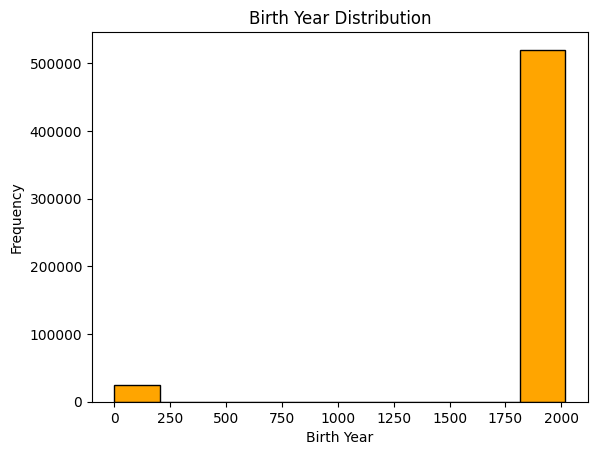

In [13]:
# Plot histogram for the 'Birth Year' column
v.plot_histogram(df['Birth Year'], 
                 'Birth Year',     # x-axis label
                 'Frequency',      # y-axis label
                 'Birth Year Distribution')  # Title of the plot

**IME-4 Count**

Very High 

In [14]:
# Filter the DataFrame for rows where 'IME-4 Count' is greater than 30
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


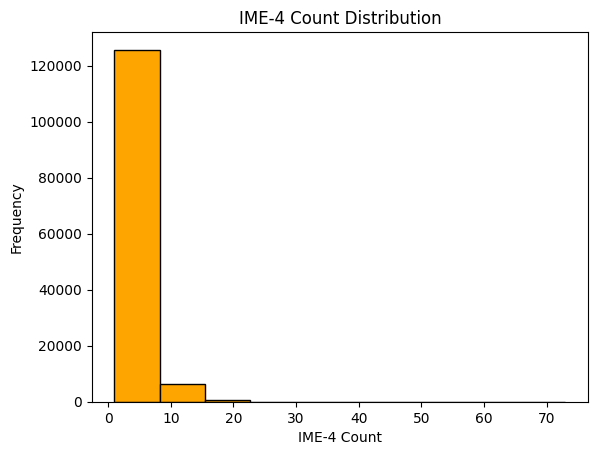

In [15]:
# Plot histogram for the 'IME-4 Count' column
v.plot_histogram(df['IME-4 Count'], 
                 'IME-4 Count',     # x-axis label
                 'Frequency',       # y-axis label
                 'IME-4 Count Distribution')  # Title of the plot

**OIICS Nature of Injury Description**

always missing

In [16]:
# Print the number of missing values in 'OIICS Nature of Injury Description'
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")

# Print the total number of rows in the DataFrame
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Zip Code**

In [17]:
# Filter the DataFrame for rows where 'Zip Code' is not missing (NaN) and where 'Zip Code' is not numeric
df[
    df['Zip Code'].notna()  # 'Zip Code' is not missing
    & df['Zip Code'].apply(lambda x: not str(x).isnumeric())  # 'Zip Code' is not numeric
]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5399802,2019-12-21,25.0,N,2020-01-09,N,1631.50,0.0,2020-01-09,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,Not Work Related,0.0
5404203,2020-01-11,29.0,N,2020-01-16,Y,1401.17,0.0,2020-03-11,2021-07-01,ACE AMERICAN INSURANCE CO.,1A. PRIVATE,5. PPD SCH LOSS,HERKIMER,N,BUFFALO,2020-10-27,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,0.0,Not Work Related,5.0
5407348,2019-12-28,23.0,N,2020-01-17,N,0.00,0.0,2020-01-17,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,0.0,Not Work Related,2.0
5412514,2019-11-26,51.0,N,2020-01-24,N,0.00,0.0,2020-01-24,NaN,STATE INSURANCE FUND,2A. SIF,3. MED ONLY,WAYNE,N,ROCHESTER,NaN,M,NaN,31.0,MANUFACTURING,UK,NaN,10.0,MACHINE OR MACHINERY,13.0,CRUSHING,52.0,UPPER LEG,JMDMR,0.0,Not Work Related,4.0
5413081,2020-01-21,27.0,N,2020-01-27,N,0.00,0.0,2020-01-27,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ERIE,N,BUFFALO,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,0.0,Not Work Related,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143240,2022-11-07,23.0,N,2022-11-29,N,0.00,0.0,2022-11-29,NaN,ARCH INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,NEW YORK,N,NYC,NaN,M,NaN,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,0.0,Not Work Related,2.0
6147711,2022-11-02,29.0,N,2022-12-06,N,0.00,0.0,2022-12-06,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,BROOME,N,BINGHAMTON,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,0.0,Not Work Related,3.0
6150118,2022-01-29,25.0,N,2022-12-09,Y,1748.25,0.0,2022-12-20,2022-12-06,STATE INSURANCE FUND,2A. SIF,5. PPD SCH LOSS,ALBANY,N,BUFFALO,2024-01-31,M,2.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,Not Work Related,0.0


**Agreement Reached**

w/ a lot of zeros

In [18]:
# Count the occurrences of each unique value in the 'Agreement Reached' column
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

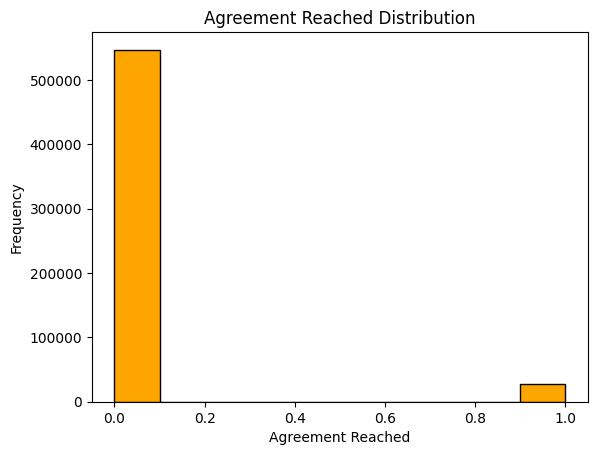

In [19]:
# Plot histogram for the 'Agreement Reached' column
v.plot_histogram(df['Agreement Reached'], 
                 'Agreement Reached',   # x-axis label
                 'Frequency',            # y-axis label
                 'Agreement Reached Distribution')  # Title of the plot

**WCB Decision**

always the same

In [20]:
# Get the unique values in the 'WCB Decision' column
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [21]:
# Count the occurrences of each unique value in the 'Claim Injury Type' column
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [22]:
# Identify columns present in the training dataset but not in the test dataset
train_columns = set(df.columns)
test_columns = set(test.columns)

# Compute the difference between the columns of the train and test datasets
not_in_train = train_columns - test_columns

# Display the columns that are present in the training dataset but missing in the test dataset
print(f'Columns in train but not in test: {not_in_train}')

Columns in train but not in test: {'Claim Injury Type', 'Agreement Reached', 'WCB Decision'}


### 2.1.1 Address Identified Incoherencies
This section focuses on resolving such incoherencies, by addressing these problems, we aim to improve the model’s reliability and predictive power.

<a href="#top">Top &#129033;</a>

**Age At Injury**

In [23]:
# Filter the DataFrame to include rows where 'Age at Injury' is between 18 and 80, or where 'Age at Injury' is missing (NaN)
df = df.loc[
    (df['Age at Injury'] >= 18) & (df['Age at Injury'] <= 80)  # Age between 18 and 80
    | (df['Age at Injury'].isna())  # Include rows where 'Age at Injury' is missing
]
# 7k rows < 18 & 700 rows > 80

**Birth Year**

In [24]:
# Filter the DataFrame to include rows where 'Birth Year' is bigger than zero or is missing (NaN)
df = df.loc[(df['Birth Year'] > 0) | (df['Birth Year'].isna())]

**IME-4 Count**

In [25]:
# Filter the DataFrame to include rows where 'IME-4 Count' is less than or equal to 30, or where 'IME-4 Count' is missing (NaN)
df = df.loc[
    (df['IME-4 Count'] <= 30)  # IME-4 Count less than or equal to 30
    | (df['IME-4 Count'].isna())  # Include rows where 'IME-4 Count' is missing
]

**Incoherent Columns**

In [26]:
df = df.drop(['WCB Decision', 'Agreement Reached'], axis = 1)

# 3. Data Cleaning & Preprocessing
The cleaning process involves handling missing values, correcting errors, and addressing inconsistencies identified earlier. Preprocessing includes tasks such as feature engineering, encoding categorical variables, normalizing numerical data, and splitting the data into training and testing sets. These steps are essential to ensure that the dataset is both structured and suitable for developing robust and reliable machine learning models.

<a href="#top">Top &#129033;</a>

In [27]:
# Display the first 5 rows of the DataFrame
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,1.0


## 3.1 Duplicates
In this section, we will focus on detecting and handling duplicates to ensure data integrity and improve model performance. Addressing duplicates is a crucial preprocessing step that contributes to better data quality and more reliable machine learning outcomes.

<a href="#top">Top &#129033;</a>

In [28]:
# Identify and return rows that are duplicates in the DataFrame
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Identify all duplicated rows in the DataFrame (keep=False marks all duplicates as True)
duplicates = df.duplicated(keep=False)

# Identify rows where at least one column (excluding 'Assembly Date') has non-missing values
non_missing_in_other_columns = df.drop(columns=['Assembly Date']).notna().any(axis=1)

# Filter the DataFrame to return rows that are duplicated and have non-missing values in other columns
df[duplicates & non_missing_in_other_columns]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [31]:
# Filter and return rows that are duplicates in the DataFrame so we can verify the success of the previous steps
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 3.2 Feature Engineering
Feature engineering is the process of transforming raw data into meaningful features to improve machine learning model performance. Effective feature engineering helps enhance predictive accuracy, reduce overfitting, and optimize model outcomes. In this section, we will explore various techniques and their impact on improving machine learning models.

<a href="#top">Top &#129033;</a>

<a class="anchor" id="section3.2"></a>

<a href="#section5.1">Go to Section 5.1 &#8595;</a>

**Claim Injury Type**

Address missing values in target variable changing data types and encoding

In [32]:
# Filter and display rows where the 'Claim Injury Type' column has missing values
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaN,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaN,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaN,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaN,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [33]:
# Remove rows with missing values in the 'Claim Injury Type' column
df.dropna(subset=['Claim Injury Type'], inplace=True)

After dropping the missing values we can encode

In [34]:
# Map descriptive labels in 'Claim Injury Type' to numeric codes for consistency and modeling
label_mapping = {
    "1. CANCELLED": 1,
    "2. NON-COMP": 2,
    "3. MED ONLY": 3,
    "4. TEMPORARY": 4,
    "5. PPD SCH LOSS": 5,
    "6. PPD NSL": 6,
    "7. PTD": 7,
    "8. DEATH": 8
}

df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

### 3.2.1 Data Type Conversions
This process includes converting numerical data from strings, encoding categorical variables, and optimizing memory usage, we will explore common conversion techniques and how they help prevent errors and improve model performance by preparing the data properly for analysis.

Even though this is usually feature engineering, it will be useful doing before treating missing values

In [35]:
#df.info()

In [36]:
# Convert date columns to datetime format for accurate date operations, sorting, and calculations.
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

In [37]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], 
                                     errors='coerce')

test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], 
                                     errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'], 
                                errors='coerce')

test['C-3 Date'] = pd.to_datetime(test['C-3 Date'], 
                                errors='coerce')

test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], 
                                          errors='coerce')

### 3.2.2 Encoding
Encoding transforms categorical data into numerical format for use in machine learning models.

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

Frequency Encoding

In [38]:
# Calculate the frequency of each unique value in the 'Alternative Dispute Resolution' column
freq = df['Alternative Dispute Resolution'].value_counts()

# Map frequency counts of 'Alternative Dispute Resolution' to a new feature
df['Alternative Dispute Resolution freq'] = df['Alternative Dispute Resolution'].map(freq)

In [39]:
freq_t = test['Alternative Dispute Resolution'].value_counts()

test['Alternative Dispute Resolution freq'] = test['Alternative Dispute Resolution'].map(freq_t)

Ordinal Encoding

In [40]:
# Initialize an ordinal encoder for 'N', 'Y', and 'U' categories
encoder = OrdinalEncoder(categories=[['N', 'Y', 'U']])

In [41]:
# Apply label encoding to the 'Alternative Dispute Resolution' column to convert categorical values into numeric format
df['Alternative Dispute Resolution Enc'] = encoder.fit_transform(df[['Alternative Dispute Resolution']])

df['Alternative Dispute Resolution Enc'] = df['Alternative Dispute Resolution Enc'].astype(int)

In [42]:
test['Alternative Dispute Resolution Enc'] = encoder.fit_transform(test[['Alternative Dispute Resolution']])

test['Alternative Dispute Resolution Enc'] = test['Alternative Dispute Resolution Enc'].astype(int)

**Attorney/Representative**

Binary Encoding

In [43]:
# Count the occurrences of each unique value in the 'Attorney/Representative' column
df['Attorney/Representative'].value_counts()

# Replace 'N' with 0 and 'Y' with 1 in the 'Attorney/Representative' column for binary encoding
df['Attorney/Representative Bin'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [44]:
test['Attorney/Representative'].value_counts()

# Replace 'N' with 0 and 'Y' with 1 in the 'Attorney/Representative' column for binary encoding
test['Attorney/Representative Bin'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

Frequency Encoding

In [45]:
# Get the number of unique values in the 'Carrier Name' column
df['Carrier Name'].nunique()

2012

In [46]:
# Count the frequency of each unique value in the 'Carrier Name' column
freq = df['Carrier Name'].value_counts()

# Map the frequency of each 'Carrier Name' to replace values with their respective counts
df['Carrier Name freq'] = df['Carrier Name'].map(freq)

In [47]:
# Count the frequency of each unique value in the 'Carrier Name' column
freq_t = test['Carrier Name'].value_counts()

# Map the frequency of each 'Carrier Name' to replace values with their respective counts
test['Carrier Name freq'] = test['Carrier Name'].map(freq_t)

**Carrier Type**

Frequency Encoding

In [48]:
# Count the frequency of each unique value in the 'Carrier Type' column
freq = df['Carrier Type'].value_counts()

# Map the frequency of each 'Carrier Type' to replace values with their respective counts
df['Carrier Type freq'] = df['Carrier Type'].map(freq)

In [49]:
# Count the frequency of each unique value in the 'Carrier Type' column
freq_t = test['Carrier Type'].value_counts()

# Map the frequency of each 'Carrier Type' to replace values with their respective counts
test['Carrier Type freq'] = test['Carrier Type'].map(freq_t)

Joing Categories & Get Dummies

In [50]:
# Mapping variations of 'Special Fund' values to a single unified category
mapping = {
    '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND'
}

In [51]:
# Apply the mapping to standardize 'Carrier Type' values
df['Carrier Type'] = df['Carrier Type'].replace(mapping)

test['Carrier Type'] = test['Carrier Type'].replace(mapping)

In [52]:
# Convert the 'Carrier Type' column into one-hot encoded dummy variables
df = pd.get_dummies(df, columns=['Carrier Type'])

# Drop the last dummy variable to prevent multicollinearity (redundancy)
df = df.iloc[:, :-1]

In [53]:
# Convert the 'Carrier Type' column into one-hot encoded dummy variables
test = pd.get_dummies(test, columns=['Carrier Type'])

# Drop the last dummy variable to prevent multicollinearity (redundancy)
test = test.iloc[:, :-1]

In [54]:
# Select columns related to 'Carrier Type' based on their column names
dummy_columns = df.filter(like='Carrier Type').columns

# Convert all the 'Carrier Type' dummy columns to integers (0 or 1)
df[dummy_columns] = df[dummy_columns].astype(int)

In [55]:
# Select columns related to 'Carrier Type' based on their column names
dummy_columns = test.filter(like='Carrier Type').columns

# Convert all the 'Carrier Type' dummy columns to integers (0 or 1)
test[dummy_columns] = test[dummy_columns].astype(int)

Verify if dummies are the same

In [56]:
df.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,2,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,540160,0,0,12091,267822,1,0,0,0,0


In [57]:
test.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,BRONX,N,NYC,NaT,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,386314,0,0,7573,201827,1,0,0,0,0


**County of Injury**

Frequency Encoding

In [58]:
# Count the number of unique values in the 'County of Injury' column
df['County of Injury'].nunique()

63

In [59]:
# Count the frequency of each unique value in the 'County of Injury' column
freq = df['County of Injury'].value_counts()

# Map the frequency of each 'County of Injury' to replace values with their respective counts
df['County of Injury freq'] = df['County of Injury'].map(freq)

In [60]:
# Count the frequency of each unique value in the 'County of Injury' column
freq_t = test['County of Injury'].value_counts()

# Map the frequency of each 'County of Injury' to replace values with their respective counts
test['County of Injury freq'] = test['County of Injury'].map(freq_t)

**COVID-19 Indicator**

Binary Encoding

In [61]:
# Count the frequency of 'N' and 'Y' values in the 'COVID-19 Indicator' column
df['COVID-19 Indicator'].value_counts()

# Replace the 'N' (No) values with 0 and 'Y' (Yes) values with 1 in the 'COVID-19 Indicator' column
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [62]:
# Count the frequency of 'N' and 'Y' values in the 'COVID-19 Indicator' column
test['COVID-19 Indicator'].value_counts()

# Replace the 'N' (No) values with 0 and 'Y' (Yes) values with 1 in the 'COVID-19 Indicator' column
test['COVID-19 Indicator'] = test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

Frequency Encoding

In [63]:
# Count the frequency of each unique value in the 'District Name' column to understand its distribution
freq = df['District Name'].value_counts()

# Replace each district name in the 'District Name' column with its corresponding frequency count
df['District Name freq'] = df['District Name'].map(freq)

In [64]:
# Count the frequency of each unique value in the 'District Name' column to understand its distribution
freq_t = test['District Name'].value_counts()

# Replace each district name in the 'District Name' column with its corresponding frequency count
test['District Name freq'] = test['District Name'].map(freq_t)

Get Dummies

In [65]:
# Generate dummy variables for the 'District Name' column
df = pd.get_dummies(df, columns=['District Name'])

# Drop the last column to avoid redundancy (since it is a result of one-hot encoding)
df = df.iloc[:, :-1]

In [66]:
# Generate dummy variables for the 'District Name' column
test = pd.get_dummies(test, columns=['District Name'])

# Drop the last column to avoid redundancy (since it is a result of one-hot encoding)
test = test.iloc[:, :-1]

In [67]:
# Identify columns related to 'District Name' generated by one-hot encoding
dummy_columns = df.filter(like='District Name').columns

# Convert the dummy variables to integer type (0 or 1)
df[dummy_columns] = df[dummy_columns].astype(int)

In [68]:
# Identify columns related to 'District Name' generated by one-hot encoding
dummy_columns = test.filter(like='District Name').columns

# Convert the dummy variables to integer type (0 or 1)
test[dummy_columns] = test[dummy_columns].astype(int)

Verify if dummies are the same

In [69]:
df.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Claim Injury Type,County of Injury,COVID-19 Indicator,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,2,ST. LAWRENCE,0,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,540160,0,0,12091,267822,1,0,0,0,0,3028,42224,0,0,0,0,0,0,0


In [70]:
test.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,County of Injury,COVID-19 Indicator,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,BRONX,0,NaT,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,386314,0,0,7573,201827,1,0,0,0,0,28048,187972,0,0,0,0,1,0,0


**Gender**

Class Encoding

In [71]:
# Count the occurrences of each gender in the 'Gender' column
df['Gender'].value_counts()

Gender
M    315982
F    222221
U      4345
X        42
Name: count, dtype: int64

In [72]:
# Count the occurrences of each gender in the 'Gender' column
test['Gender'].value_counts()

Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64

In [73]:
# Map gender values to numerical codes: 0 for Male, 1 for Female, 2 for Unknown/Other
df['Gender Enc'] = df['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

In [74]:
# Map gender values to numerical codes: 0 for Male, 1 for Female, 2 for Unknown/Other
test['Gender Enc'] = test['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

Get Dummies

In [75]:
# Encoding on the 'Gender' column, creating dummy variables
df = pd.get_dummies(df, columns=['Gender'])

# Drop the last column to avoid redundancy, as one column is sufficient for binary encoding
df = df.iloc[:, :-1]

In [76]:
# Encoding on the 'Gender' column, creating dummy variables
test = pd.get_dummies(test, columns=['Gender'])

# Drop the last column to avoid redundancy, as one column is sufficient for binary encoding
test = test.iloc[:, :-1]

In [77]:
# Get the names of the newly created dummy columns related to 'Gender'
dummy_columns = df.filter(like='Gender').columns

# Convert the dummy columns to integer type (0 or 1) for model compatibility
df[dummy_columns] = df[dummy_columns].astype(int)

In [78]:
# Get the names of the newly created dummy columns related to 'Gender'
dummy_columns = test.filter(like='Gender').columns

# Convert the dummy columns to integer type (0 or 1) for model compatibility
test[dummy_columns] = test[dummy_columns].astype(int)

Verify if dummies are the same

In [79]:
df.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Claim Injury Type,County of Injury,COVID-19 Indicator,First Hearing Date,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,Gender Enc,Gender_F,Gender_M,Gender_U
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,2,ST. LAWRENCE,0,NaT,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0,540160,0,0,12091,267822,1,0,0,0,0,3028,42224,0,0,0,0,0,0,0,0,0,1,0


In [80]:
test.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,County of Injury,COVID-19 Indicator,First Hearing Date,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,Gender Enc,Gender_F,Gender_M,Gender_U
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,BRONX,0,NaT,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,386314,0,0,7573,201827,1,0,0,0,0,28048,187972,0,0,0,0,1,0,0,0,0,1,0


**Medical Fee Region**

Frequency Encoding

In [81]:
# Calculate the frequency of each unique value in the 'Medical Fee Region' column
freq = df['Medical Fee Region'].value_counts()
freq # Display the frequency counts

# Replace each 'Medical Fee Region' value with its corresponding frequency count
df['Medical Fee Region freq'] = df['Medical Fee Region'].map(freq)

In [82]:
# Calculate the frequency of each unique value in the 'Medical Fee Region' column
freq_t = test['Medical Fee Region'].value_counts()

# Replace each 'Medical Fee Region' value with its corresponding frequency count
test['Medical Fee Region freq'] = test['Medical Fee Region'].map(freq_t)

### 3.2.3 Other Transformations
In addition to encoding, various transformations like scaling, normalization, imputation, and mathematical transformations are essential for preparing data. These techniques improve data quality, ensure compatibility with algorithms, and enhance model performance. 

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [83]:
# Extract the year, month, and day from the 'Accident Date' column and assign them to new columns
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

In [84]:
test['Accident Year'] = test['Accident Date'].dt.year
test['Accident Month'] = test['Accident Date'].dt.month
test['Accident Day'] = test['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [85]:
# Extract the year, month, and day from the 'Assembly Date' column and assign them to new columns
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

In [86]:
test['Assembly Year'] = test['Assembly Date'].dt.year
test['Assembly Month'] = test['Assembly Date'].dt.month
test['Assembly Day'] = test['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [87]:
# Extract the year, month, and day from the 'C-2 Date' column and assign them to new columns
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

In [88]:
test['C-2 Year'] = test['C-2 Date'].dt.year
test['C-2 Month'] = test['C-2 Date'].dt.month
test['C-2 Day'] = test['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values and add a binary column that is 1 if string, 0 if numeric and -1 to NaN

In [89]:
# Create a new column 'Zip Code Valid' to flag the validity of the 'Zip Code' field
df['Zip Code Valid'] = df['Zip Code'].apply(
    lambda x: -1 if pd.isna(x)          # Assign -1 for missing values (NaN)
    else (1 if not str(x).isnumeric()    # Assign 1 for non-numeric values
          else 0)                        # Assign 0 for valid numeric Zip Codes
)

In [90]:
# Create a new column 'Zip Code Numbers' to retain numeric zip codes and set non-numeric values as NaN
df['Zip Code Numbers'] = df['Zip Code'].apply(
    lambda x: np.nan                    # Assign NaN for non-numeric values
    if not str(x).isnumeric()            # Check if the value is not numeric
    else x                               # Keep the original value if it's numeric
)

In [91]:
# Create a new column 'Zip Code Valid' to flag the validity of the 'Zip Code' field
test['Zip Code Valid'] = test['Zip Code'].apply(
    lambda x: -1 if pd.isna(x)          # Assign -1 for missing values (NaN)
    else (1 if not str(x).isnumeric()    # Assign 1 for non-numeric values
          else 0)                        # Assign 0 for valid numeric Zip Codes
)

In [92]:
# Create a new column 'Zip Code Numbers' to retain numeric zip codes and set non-numeric values as NaN
test['Zip Code Numbers'] = test['Zip Code'].apply(
    lambda x: np.nan                    # Assign NaN for non-numeric values
    if not str(x).isnumeric()            # Check if the value is not numeric
    else x                               # Keep the original value if it's numeric
)

**Drop Transformed Columns**

In [93]:
# Columns to drop:
to_drop = ['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative',
              'C-2 Date', 'Carrier Name','County of Injury',
              'Medical Fee Region', 'Zip Code']

In [94]:
# Drop transformed columns: 
df = df.drop(to_drop, axis = 1)

In [95]:
test = test.drop(to_drop, axis = 1)

### 3.2.4 Unique Feature-Pair Analysis 
Unique-feature pair analysis examines the relationships between pairs of features to identify patterns, correlations, and interactions. This analysis helps in feature selection, and improving model performance.

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [96]:
# Create a new dataframe with unique combinations of 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description'
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

# Set 'WCIO Cause of Injury Code' as the index for the new dataframe
injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

# Display the first 2 rows of the resulting dataframe
injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [97]:
# Create a new dataframe with unique combinations of 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description'
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

# Set 'WCIO Nature of Injury Code' as the index for the new dataframe
injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

# Display the first 2 rows of the resulting dataframe
injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [98]:
# Create a new dataframe with unique combinations of 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description'
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

# Set 'WCIO Part Of Body Code' as the index for the new dataframe
body_code_df = body_code.set_index('WCIO Part Of Body Code')

# Display the first 2 rows of the resulting dataframe
body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [99]:
# Create a new dataframe with unique combinations of 'Industry Code' and 'Industry Code Description'
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

# Set 'Industry Code' as the index for the new dataframe
industry_code_df = industry_code.set_index('Industry Code')

# Display the first 2 rows of the resulting dataframe
industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


In [100]:
to_drop2 = ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description']

In [101]:
# Drop unnecessary columns from the DataFrame
df = df.drop(to_drop2, axis = 1)

In [102]:
# Drop unnecessary columns from the DataFrame
test = test.drop(to_drop2, axis = 1)

## 3.3 Train-Test Split
The train-test split is a crucial technique used to assess model performance by dividing the dataset into training and testing subsets. This ensures that the model is evaluated on unseen data, helping to prevent overfitting and providing an unbiased performance estimate. 

<a href="#top">Top &#129033;</a>

In [103]:
# Print the first 2 rows
df.head(2)

,Age at Injury,Average Weekly Wage,Birth Year,C-3 Date,Claim Injury Type,COVID-19 Indicator,First Hearing Date,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,Gender Enc,Gender_F,Gender_M,Gender_U,Medical Fee Region freq,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,Zip Code Valid,Zip Code Numbers
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,0.00,1988.0,NaT,2,0,NaT,NaN,44.0,NaN,27.0,10.0,62.0,1.0,540160,0,0,12091,267822,1,0,0,0,0,3028,42224,0,0,0,0,0,0,0,0,0,1,0,128357,2019,12,30,2020,1,1,2019.0,12.0,31.0,0,13662
5393091,46.0,1745.93,1973.0,2020-01-14,4,0,2020-02-21,4.0,23.0,NaN,97.0,49.0,38.0,4.0,540160,0,1,2545,267822,1,0,0,0,0,673,38428,0,0,0,0,0,1,0,1,1,0,0,128357,2019,8,30,2020,1,1,2020.0,1.0,1.0,0,14569


**Holdout Method**

In [104]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop('Claim Injury Type', axis=1)  # Features: All columns except 'Claim Injury Type'
y = df['Claim Injury Type']  # Target variable: 'Claim Injury Type' column

In [105]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, # 20% of the data will be used for validation
                                                    random_state=42, # Set a fixed seed for reproducibility of the split
                                                    stratify = y) # Ensure the distribution of the target variable is preserved in both sets


## 3.4 Missing Values
Missing values can affect model performance and must be handled appropriately. This section covers techniques for dealing with missing data, including imputation methods and deletion, to ensure that the dataset is complete and ready for accurate model training and evaluation.

<a href="#top">Top &#129033;</a>

In [106]:
# Count missing values in the training dataset
X_train.isna().sum()

Age at Injury                               0
Average Weekly Wage                     21625
Birth Year                              22978
C-3 Date                               293327
COVID-19 Indicator                          0
First Hearing Date                     320011
IME-4 Count                            332404
Industry Code                            6346
OIICS Nature of Injury Description     434072
WCIO Cause of Injury Code                9875
WCIO Nature of Injury Code               9886
WCIO Part Of Body Code                  10714
Number of Dependents                        0
Alternative Dispute Resolution freq         0
Alternative Dispute Resolution Enc          0
Attorney/Representative Bin                 0
Carrier Name freq                           0
Carrier Type freq                           0
Carrier Type_1A. PRIVATE                    0
Carrier Type_2A. SIF                        0
Carrier Type_3A. SELF PUBLIC                0
Carrier Type_4A. SELF PRIVATE     

**Accident Year, Month, Day**

need to fill before birth year otherwise error

In [107]:
# Define median values for Accident-related features from the training dataset
accident_med = {
    'Accident Year': X_train['Accident Year'].median(),  # Median of the 'Accident Year' column
    'Accident Month': X_train['Accident Month'].median(),  # Median of the 'Accident Month' column
    'Accident Day': X_train['Accident Day'].median()  # Median of the 'Accident Day' column
}

In [108]:
# Fill missing values in the 'Accident Year', 'Accident Month', and 'Accident Day' columns of the training dataset
X_train['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)  # Replace NaN with median for 'Accident Year'
X_train['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)  # Replace NaN with median for 'Accident Month'
X_train['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)  # Replace NaN with median for 'Accident Day'

In [109]:
# Fill missing values in the 'Accident Year', 'Accident Month', and 'Accident Day' columns of the validation dataset
X_val['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)  # Replace NaN with median for 'Accident Year'
X_val['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)  # Replace NaN with median for 'Accident Month'
X_val['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)  # Replace NaN with median for 'Accident Day'

In [110]:
# Fill missing values in the 'Accident Year', 'Accident Month', and 'Accident Day' columns of the testing dataset
test['Accident Year'].fillna(accident_med['Accident Year'], inplace=True) # Replace NaN with median for 'Accident Year'
test['Accident Month'].fillna(accident_med['Accident Month'], inplace=True) # Replace NaN with median for 'Accident Month'
test['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)  # Replace NaN with median for 'Accident Day'

**Birth Year**

In [111]:
# Mask for X_train where 'Birth Year' is missing or 0 and other columns are not missing
train_mask = X_train['Accident Year'].notna() & X_train['Age at Injury'].notna() & \
           (X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
X_train.loc[train_mask, 'Birth Year'] = X_train['Accident Year'] - X_train['Age at Injury']


In [112]:
# Identify rows in validation data where 'Birth Year' can be inferred
val_mask = (
    X_val['Accident Year'].notna() &  # 'Accident Year' must not be null
    X_val['Age at Injury'].notna() &  # 'Age at Injury' must not be null
    (X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0))  # 'Birth Year' is missing or zero
)

# Calculate 'Birth Year' for rows satisfying the condition
X_val.loc[val_mask, 'Birth Year'] = X_val['Accident Year'] - X_val['Age at Injury']

In [113]:
# Mask for X_val where 'Birth Year' is missing or 0 and other columns are not missing
test_mask = test['Accident Year'].notna() & test['Age at Injury'].notna() & \
           (test['Birth Year'].isna() | (test['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
test.loc[test_mask, 'Birth Year'] = test['Accident Year'] - test['Age at Injury']


**C-3 Date**

In [114]:
# Count and display the number of rows with missing values in the 'C-3 Date' column
print(f'There are {len(X_train[X_train["C-3 Date"].isna()])} rows with missing values')

#X_train[X_train['C-3 Date'].isna()].head(2)

There are 293327 rows with missing values


In [115]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)

In [116]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing (validation)
X_val['C-3 Date Binary'] = X_val['C-3 Date'].notna().astype(int)

In [117]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
test['C-3 Date Binary'] = test['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [118]:
# Count and display the number of rows with missing values in the 'First Hearing Date' column
print(f'There are {len(X_train[X_train["First Hearing Date"].isna()])} rows with missing values')

#X_train[X_train['First Hearing Date'].isna()].head(2)

There are 320011 rows with missing values


In [119]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
X_train['First Hearing Year'] = X_train['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

In [120]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year (validation)
X_val['First Hearing Year'] = X_val['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

In [121]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
test['First Hearing Year'] = test['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [122]:
# Count and display the number of rows with missing values in the 'IME-4 Count' column
print(f'There are {len(X_train[X_train["IME-4 Count"].isna()])} rows with missing values')

#X_train[X_train['IME-4 Count'].isna()].head(2)

There are 332404 rows with missing values


In [123]:
# Fill missing values in the 'IME-4 Count' column with 0
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [124]:
# Fill missing values in the 'IME-4 Count' column with 0 (validation)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

In [125]:
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [126]:
# Count and print the number of rows with missing values in the 'OIICS Nature of Injury Description' column
print(f'There are {len(X_train[X_train["OIICS Nature of Injury Description"].isna()])} rows with missing values')

#X_train[X_train['OIICS Nature of Injury Description'].isna()].head(2)

There are 434072 rows with missing values


In [127]:
# Size of missing / Size of dataset
len(X_train[X_train['OIICS Nature of Injury Description'].isna()]) / len(X_train)

1.0

Drop replaced and not needed variables

In [128]:
# Drop columns 'C-3 Date', 'First Hearing Date', and 'OIICS Nature of Injury Description' from the dataset
X_train = X_train.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

In [129]:
# Drop columns 'C-3 Date', 'First Hearing Date', and 'OIICS Nature of Injury Description' from the validation set
X_val = X_val.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

In [130]:
test = test.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

**Code Variables** 

(Except zip code)

In [131]:
# Define a list of columns that need to be filled
columns_to_fill = [
    'WCIO Cause of Injury Code', 
    'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 
    'Industry Code'
]

In [132]:
# Fill missing values (NaN) in the specified columns with 0
X_train[columns_to_fill] = X_train[columns_to_fill].fillna(0)

In [133]:
# Fill missing values (NaN) in the specified columns with 0 in the validation set
X_val[columns_to_fill] = X_val[columns_to_fill].fillna(0)

In [134]:
test[columns_to_fill] = test[columns_to_fill].fillna(0)

**Zip Code**

In [135]:
# Fill missing values (NaN) in the 'Zip Code Numbers' column with a placeholder value of 99999
X_train['Zip Code Numbers'] = X_train['Zip Code Numbers'].fillna(99999)

In [136]:
# Fill missing values (NaN) in the 'Zip Code Numbers' column with a placeholder value of 99999 in the validation set
X_val['Zip Code Numbers'] = X_val['Zip Code Numbers'].fillna(99999)

In [137]:
test['Zip Code Numbers'] = test['Zip Code Numbers'].fillna(99999)

**C-2 Year, Month, Day**

In [138]:
# Create a dictionary with the median values of 'C-2 Year', 'C-2 Month', and 'C-2 Day' from the training set
c2_med = {
    'C-2 Year': X_train['C-2 Year'].median(),
    'C-2 Month': X_train['C-2 Month'].median(),
    'C-2 Day': X_train['C-2 Day'].median()
}

In [139]:
# Fill missing values (NaN) in the 'C-2 Year', 'C-2 Month', and 'C-2 Day' columns with their respective median values
X_train['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_train['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_train['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

In [140]:
# Fill missing values (NaN) in the 'C-2 Year', 'C-2 Month', and 'C-2 Day' columns of the validation set with their respective median values
X_val['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_val['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_val['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

In [141]:
test['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
test['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
test['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

**Average Weekly Wage**

In [142]:
# Use Ball Tree imputation to fill missing values in the 'Average Weekly Wage' column in the training set
# This method imputes missing values based on the nearest neighbors, with n_neighbors set to 5
X_train['Average Weekly Wage'] = p.ball_tree_impute(X_train, 'Average Weekly Wage', n_neighbors=5)

In [143]:
# Use Ball Tree imputation to fill missing values in the 'Average Weekly Wage' column in the validation set
# This method imputes missing values based on the nearest neighbors, with n_neighbors set to 5
X_val['Average Weekly Wage'] = p.ball_tree_impute(X_val, 'Average Weekly Wage', n_neighbors=5)

In [144]:
test['Average Weekly Wage'] = p.ball_tree_impute(test, 'Average Weekly Wage', n_neighbors=5)

**Verify the success**

In [145]:
# Print the count of missing values (NaN) for each column in the training set (X_train)
print('X_train \n')
print(X_train.isna().sum())

# Print the count of missing values (NaN) for each column in the validation set (X_val)
print('\nX_val \n')
print(X_val.isna().sum())

# Print the count of missing values (NaN) for each column in the test set (test)
print('\ntest \n')
print(test.isna().sum())

X_train 

Age at Injury                          0
Average Weekly Wage                    0
Birth Year                             0
COVID-19 Indicator                     0
IME-4 Count                            0
Industry Code                          0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Number of Dependents                   0
Alternative Dispute Resolution freq    0
Alternative Dispute Resolution Enc     0
Attorney/Representative Bin            0
Carrier Name freq                      0
Carrier Type freq                      0
Carrier Type_1A. PRIVATE               0
Carrier Type_2A. SIF                   0
Carrier Type_3A. SELF PUBLIC           0
Carrier Type_4A. SELF PRIVATE          0
Carrier Type_5. SPECIAL FUND           0
County of Injury freq                  0
District Name freq                     0
District Name_ALBANY                   0
District Name_BINGHAMTON               0
Distri

## 3.5 Outliers
This section covers methods to detect outliers, such as statistical tests and visualizations, and strategies to handle them, including removal or transformation, to ensure robust and accurate models.

<a href="#top">Top &#129033;</a>

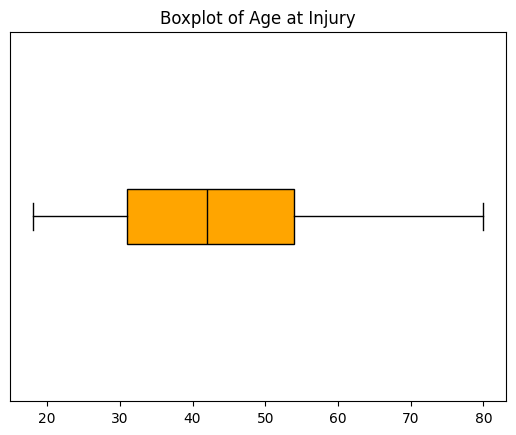

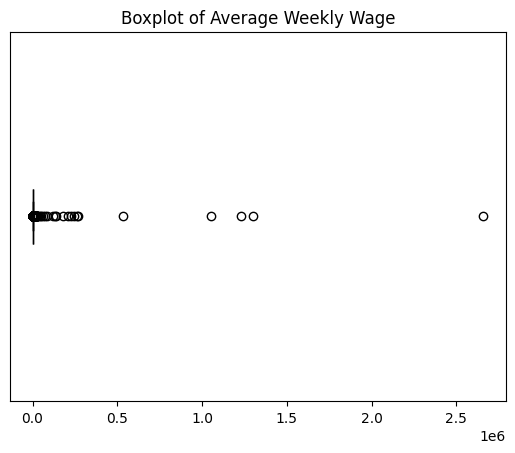

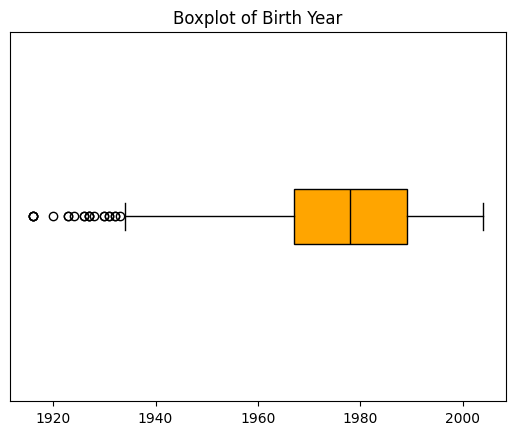

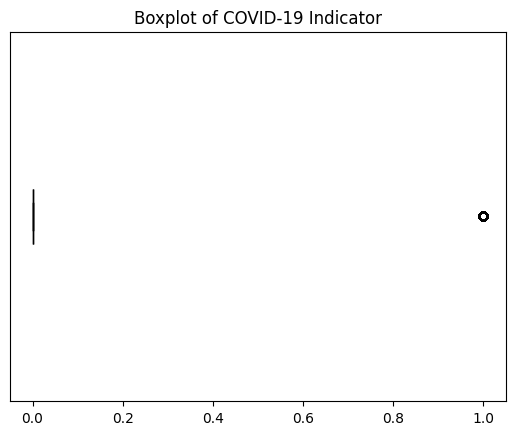

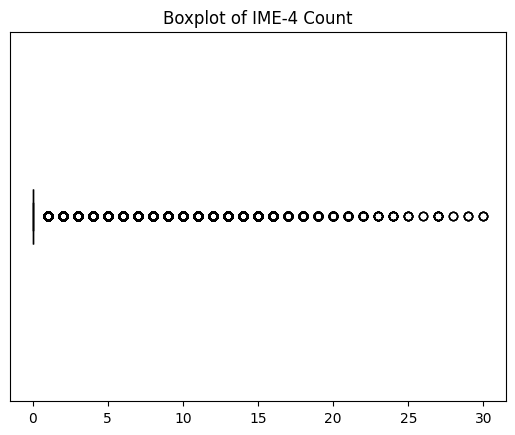

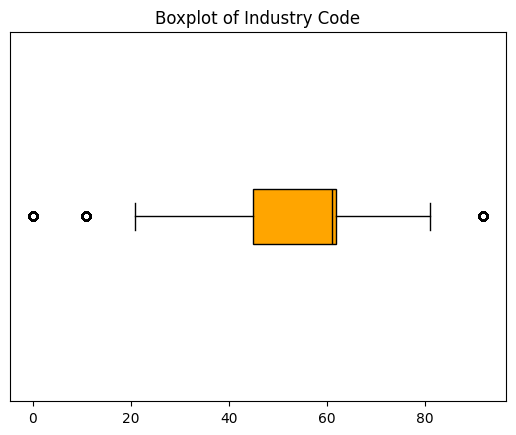

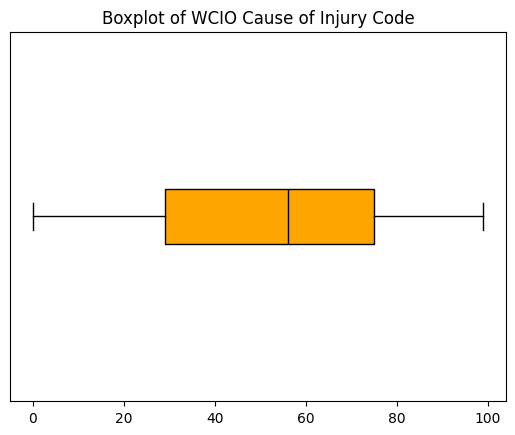

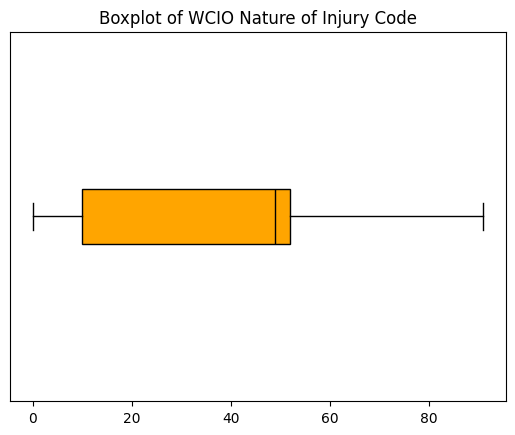

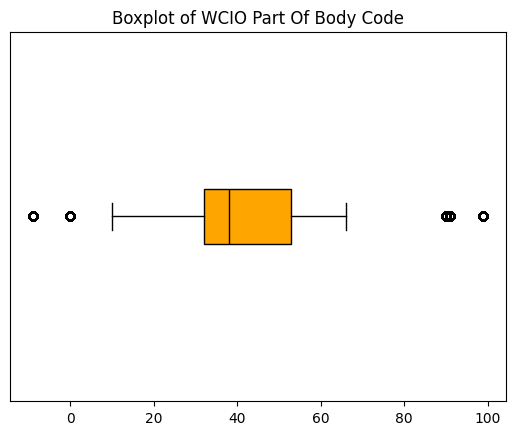

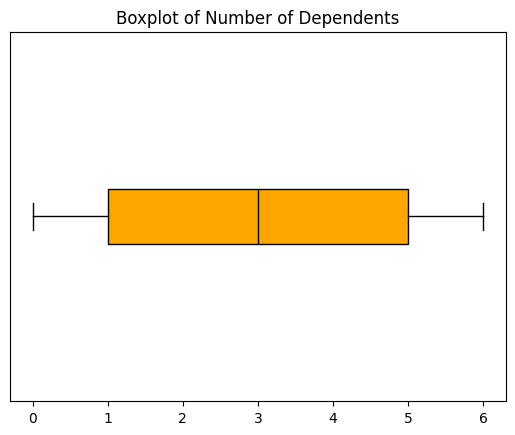

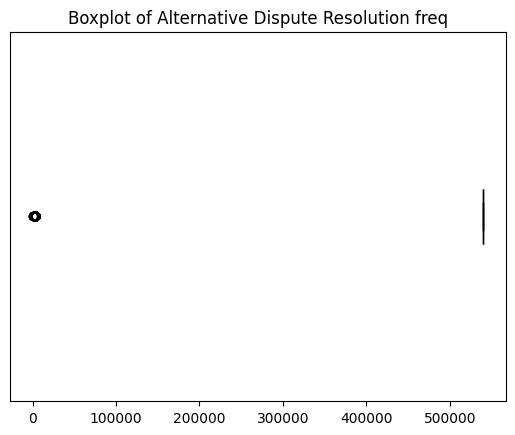

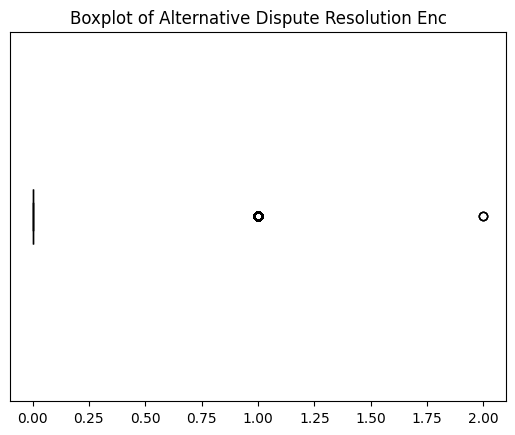

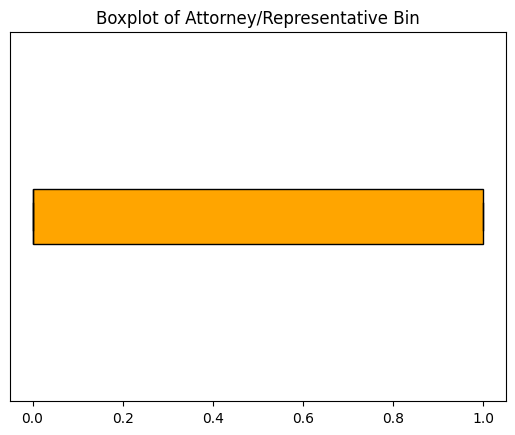

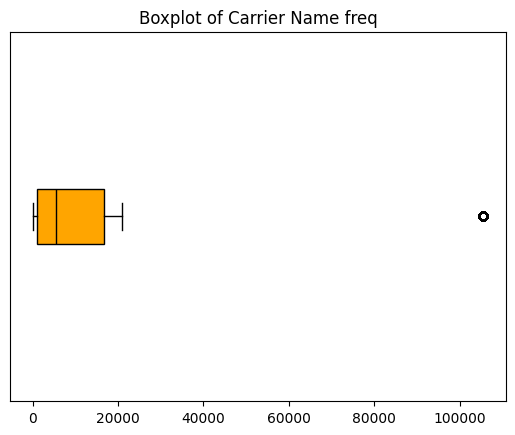

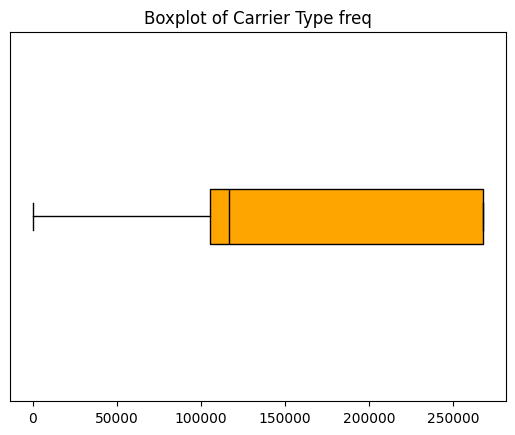

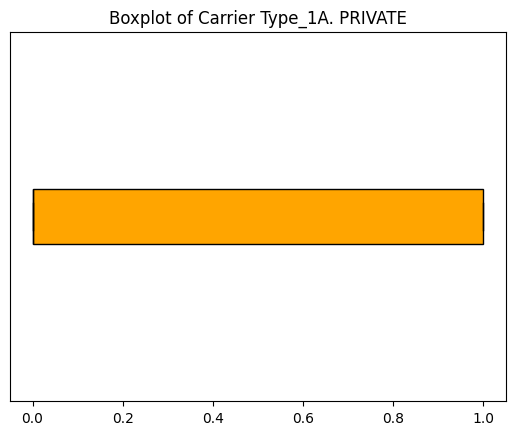

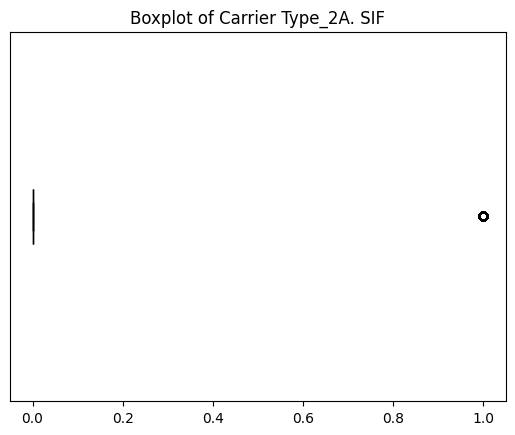

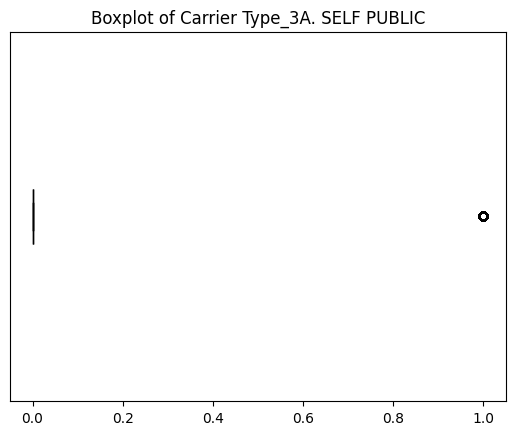

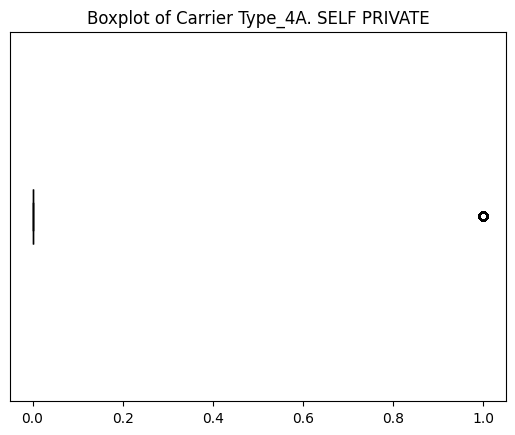

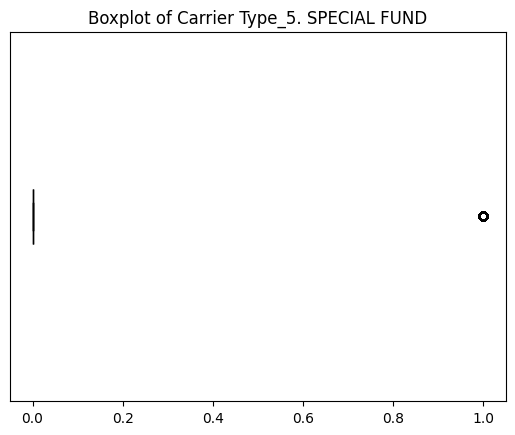

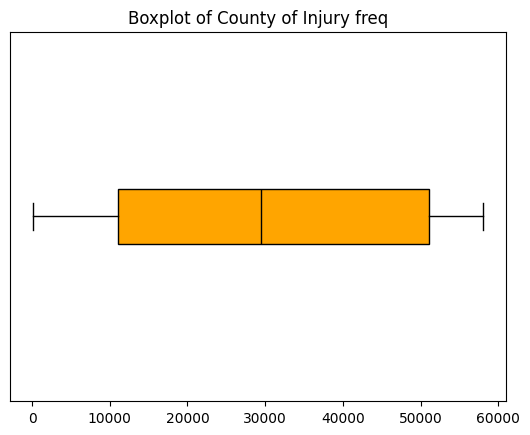

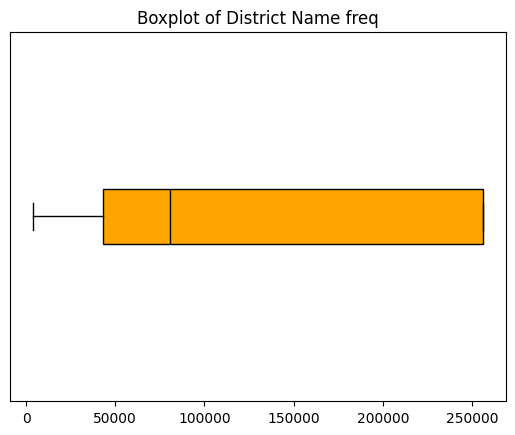

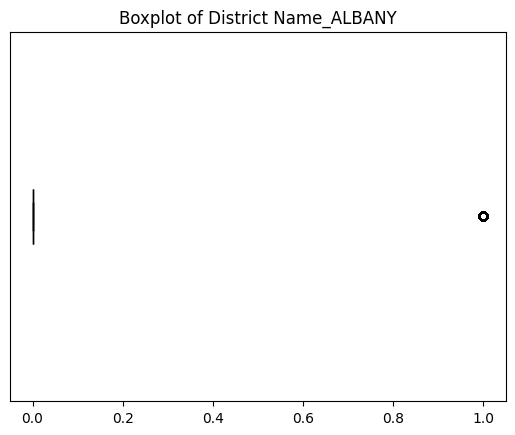

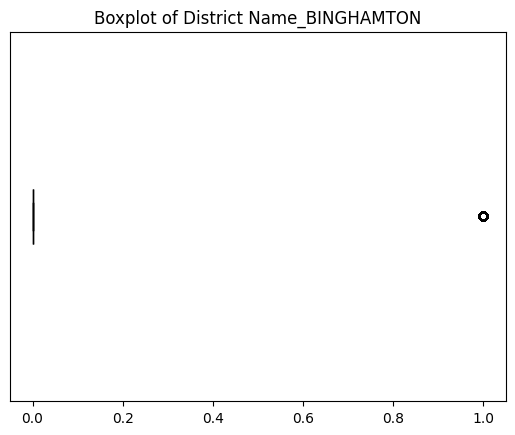

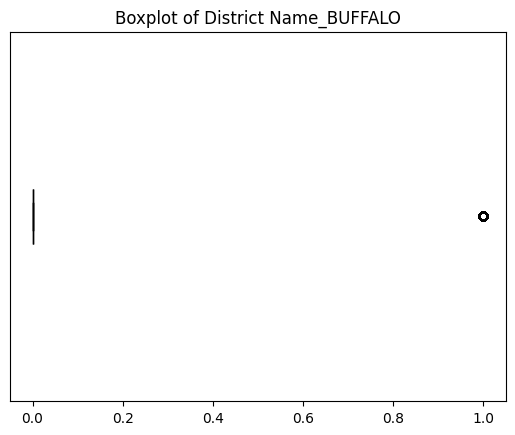

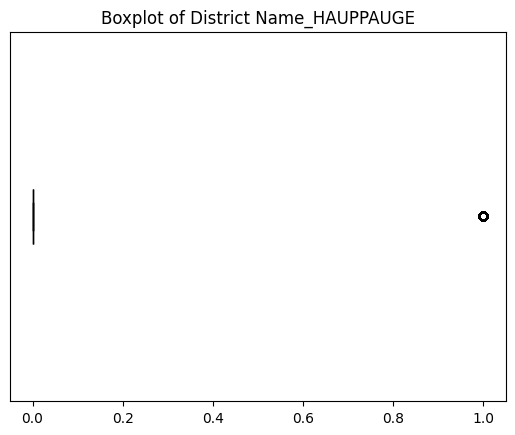

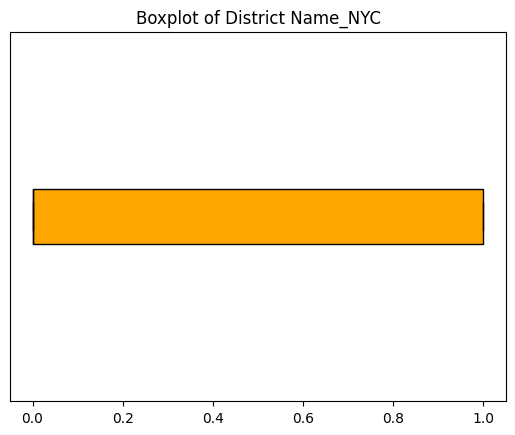

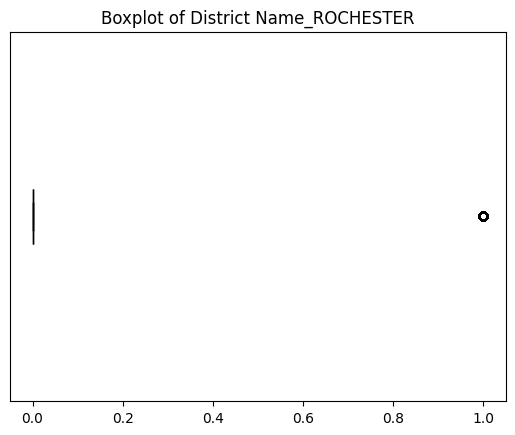

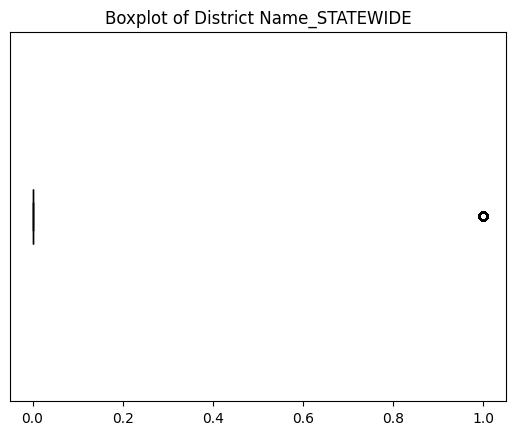

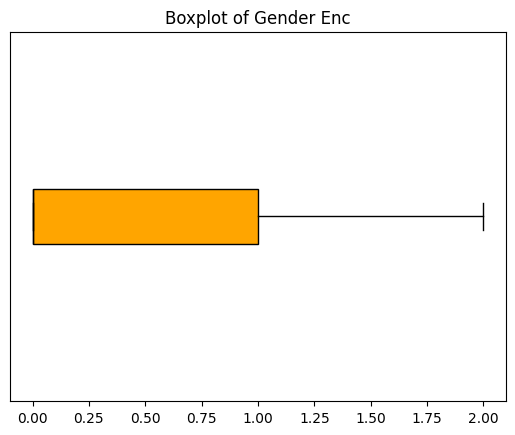

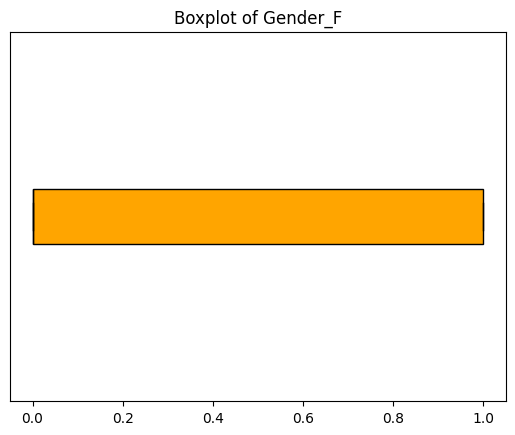

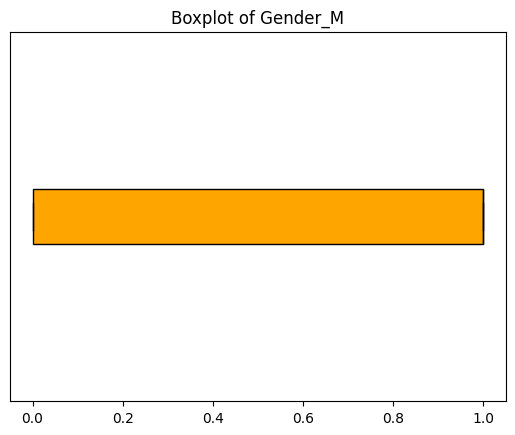

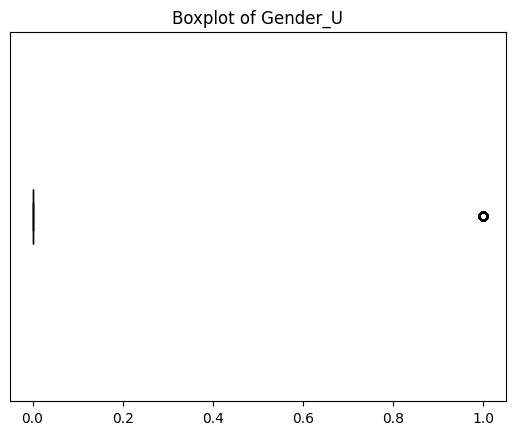

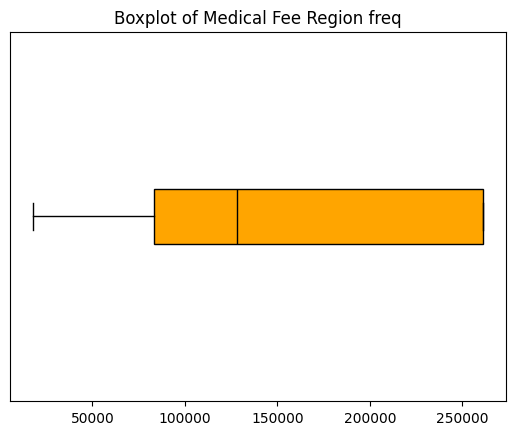

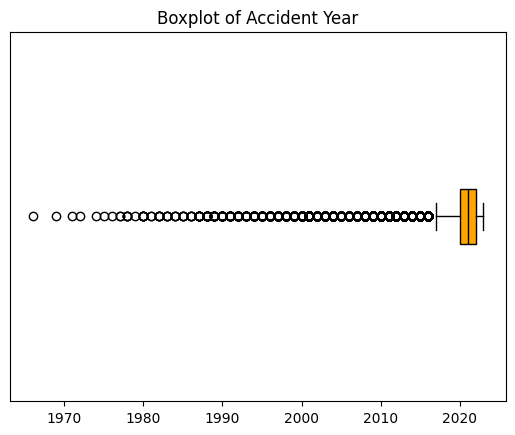

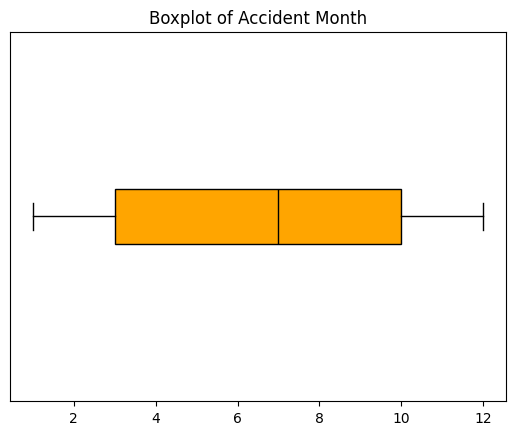

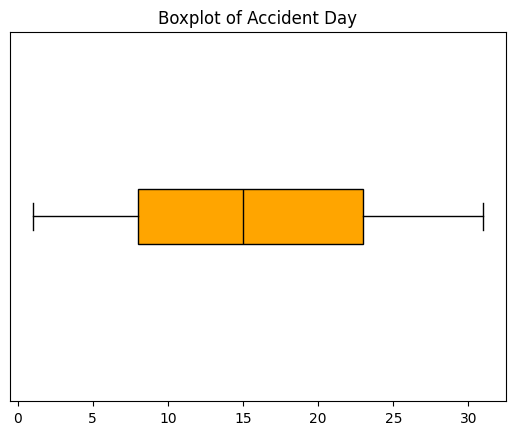

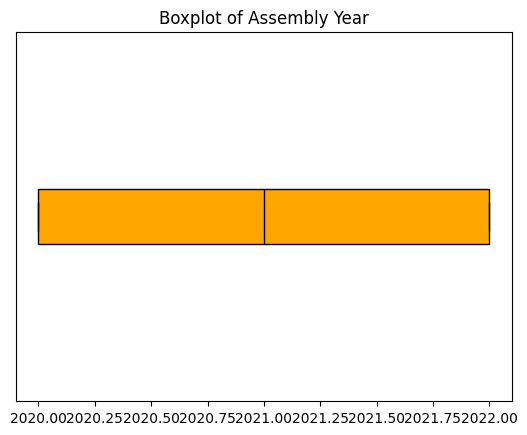

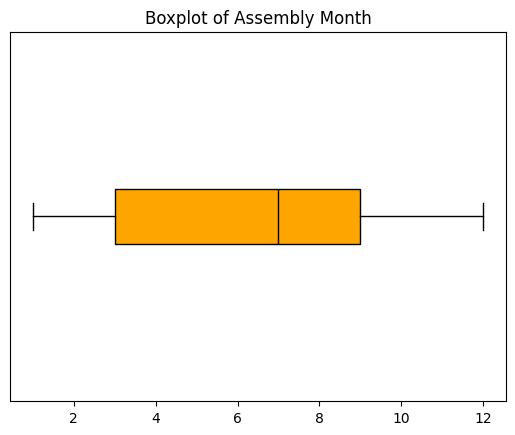

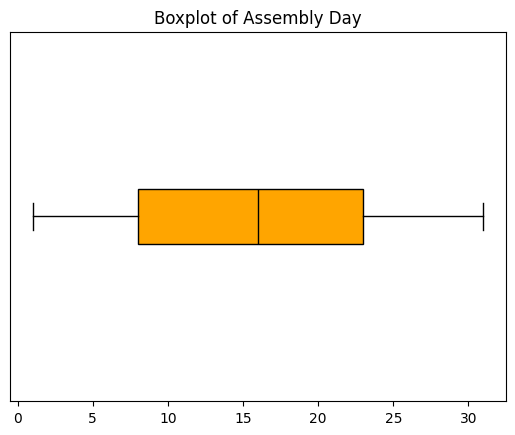

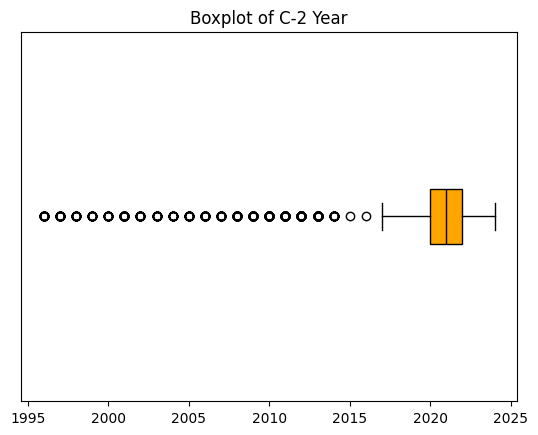

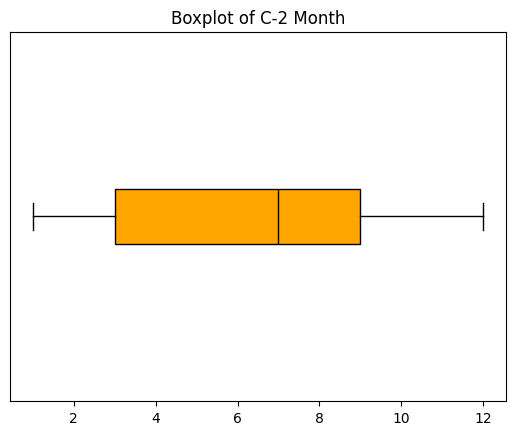

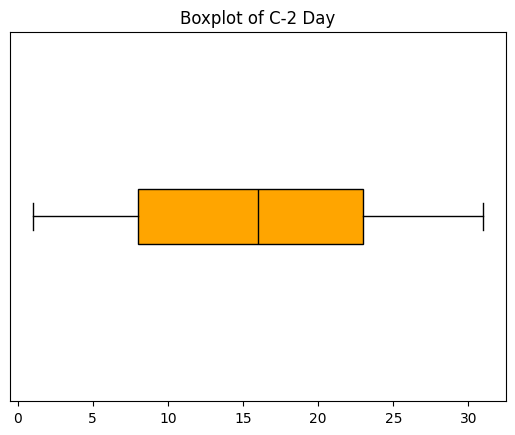

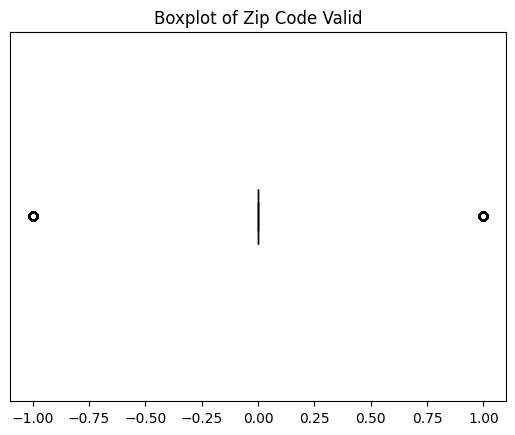

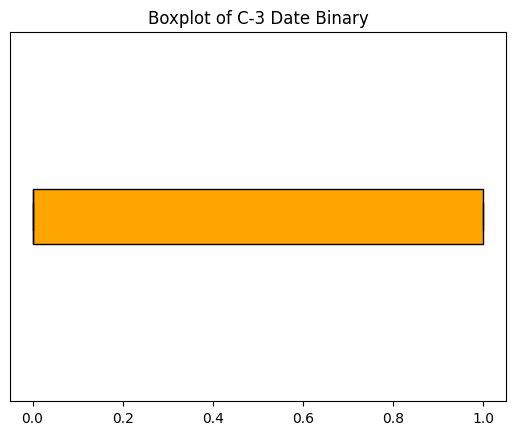

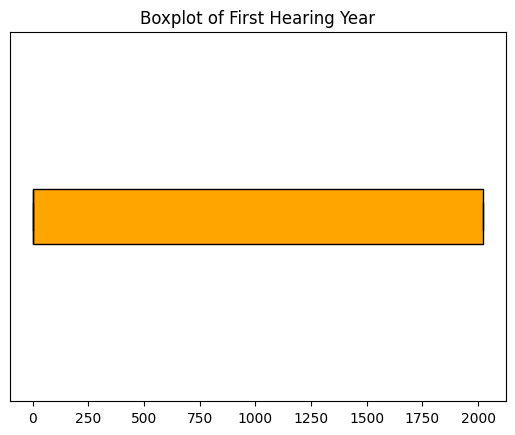

In [146]:
# Create boxplots for each column in the training set (X_train) to visualize the distribution and detect outliers
v.boxplots(X_train.loc[:, X_train.columns])

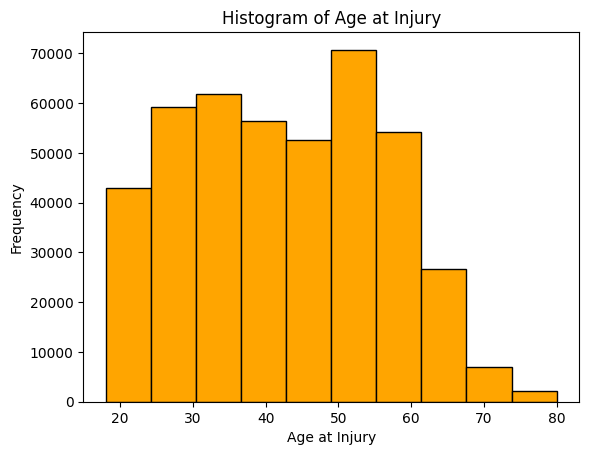

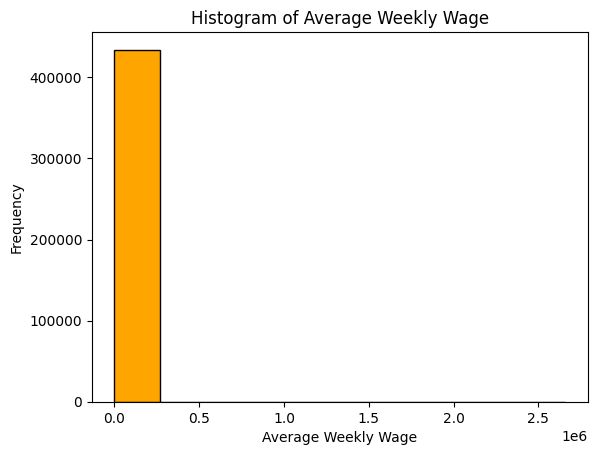

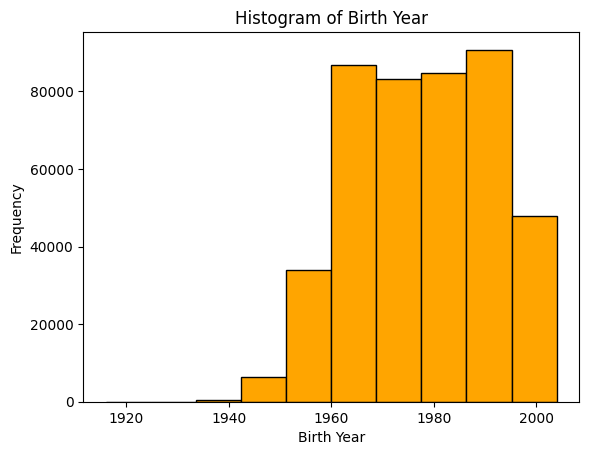

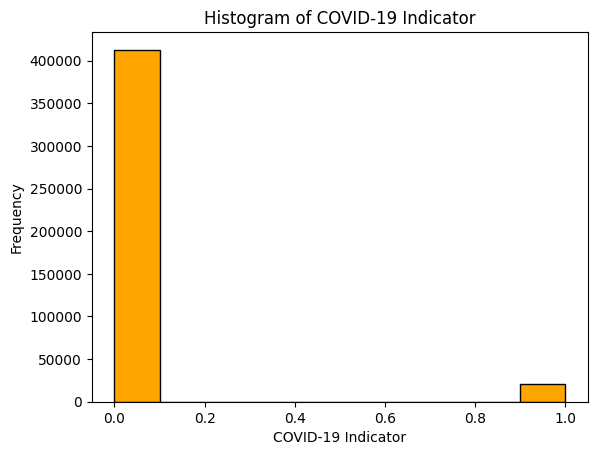

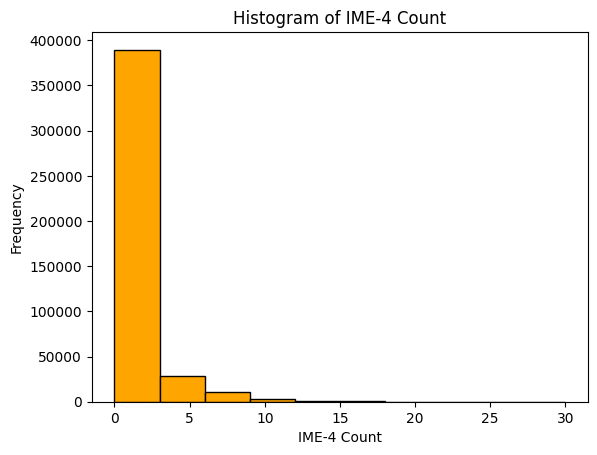

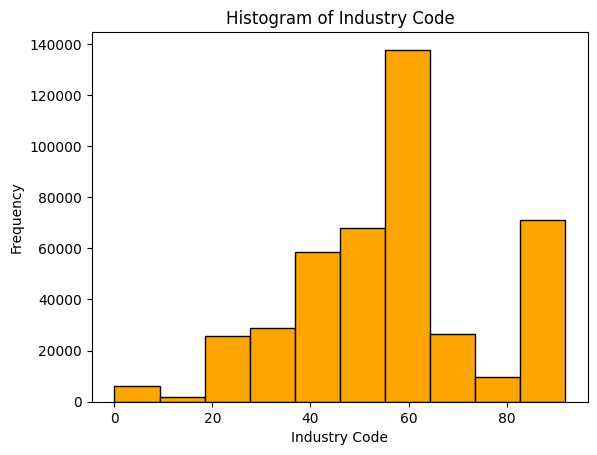

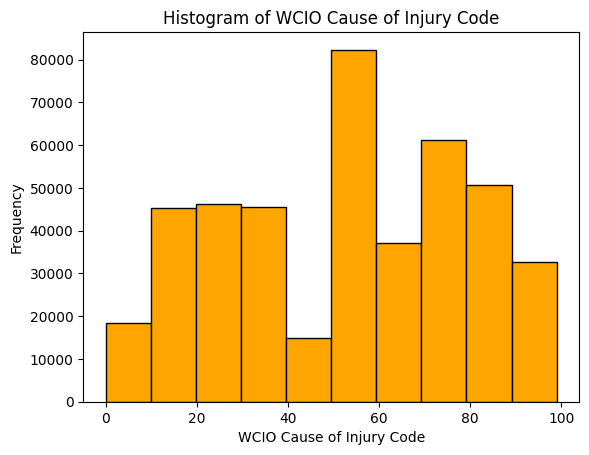

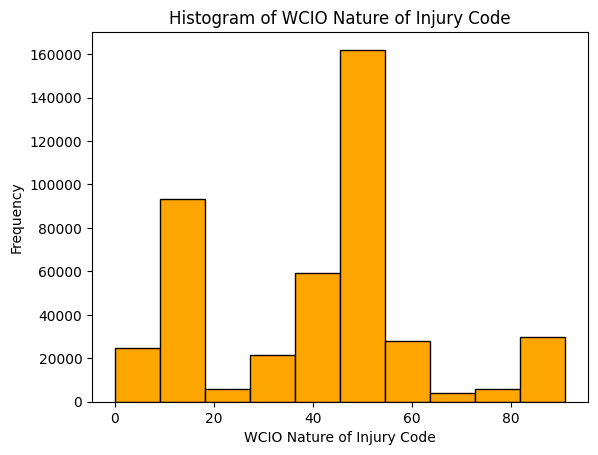

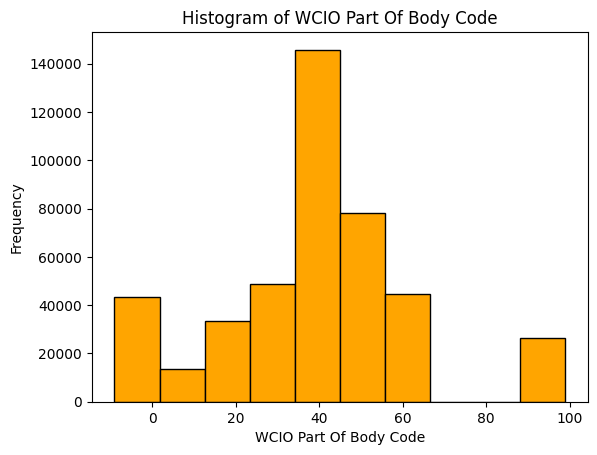

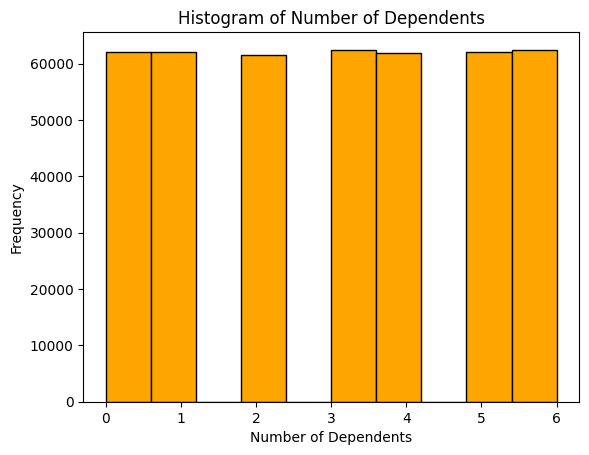

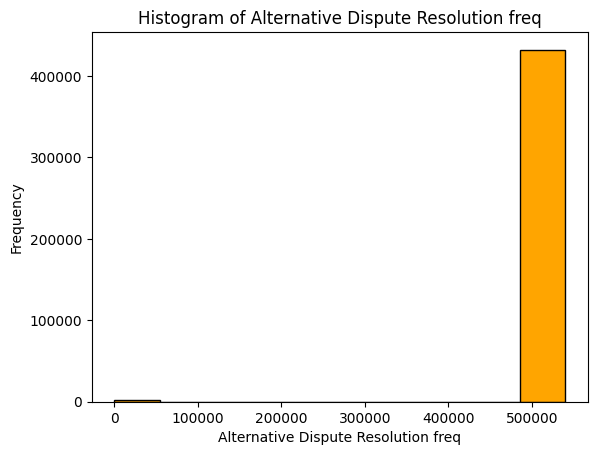

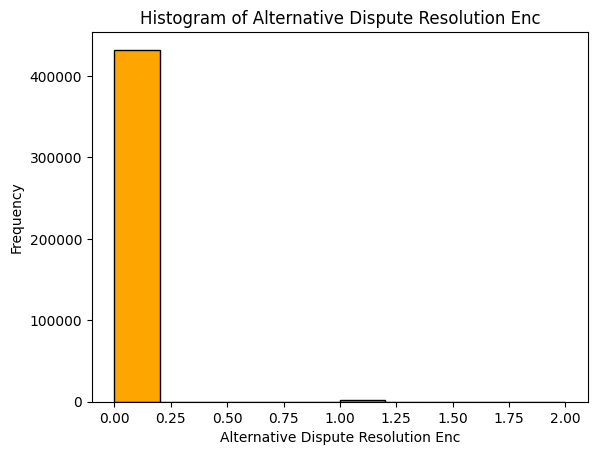

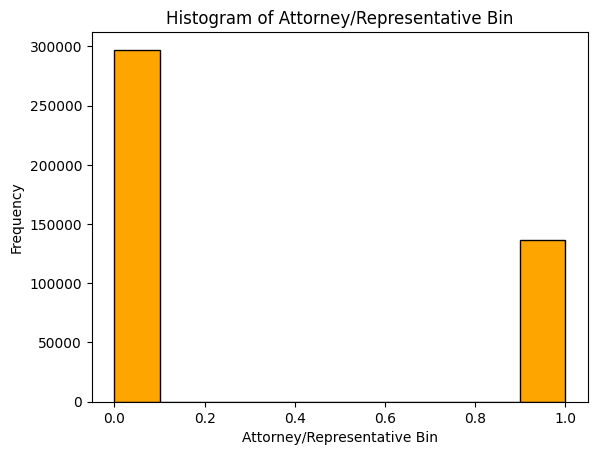

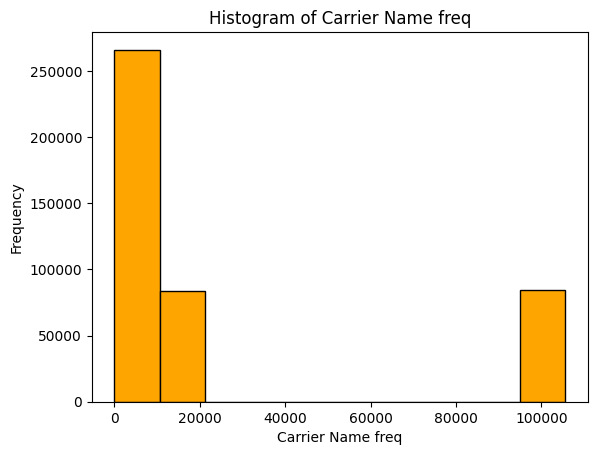

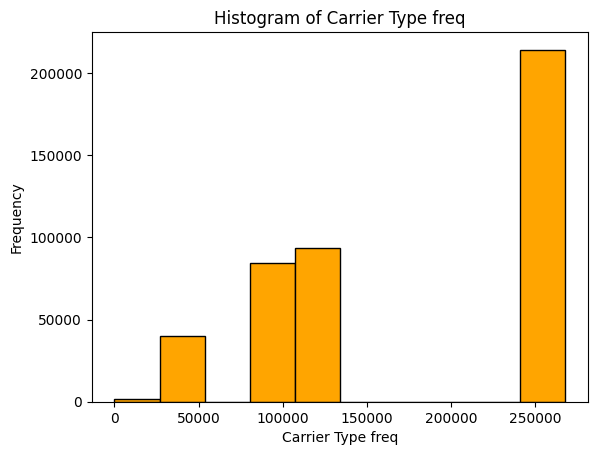

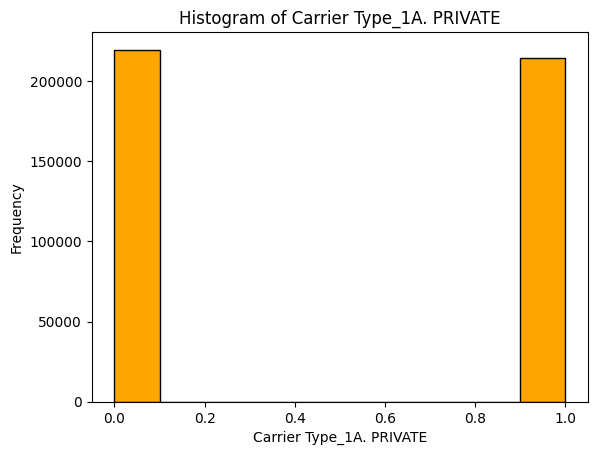

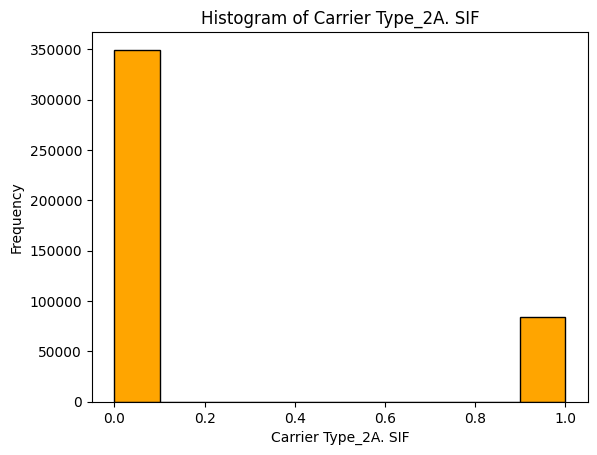

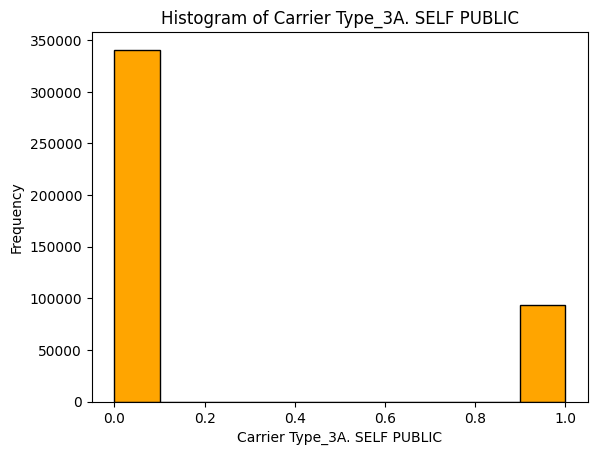

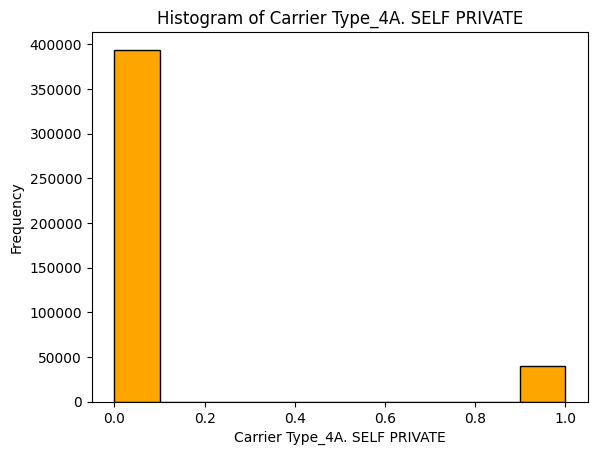

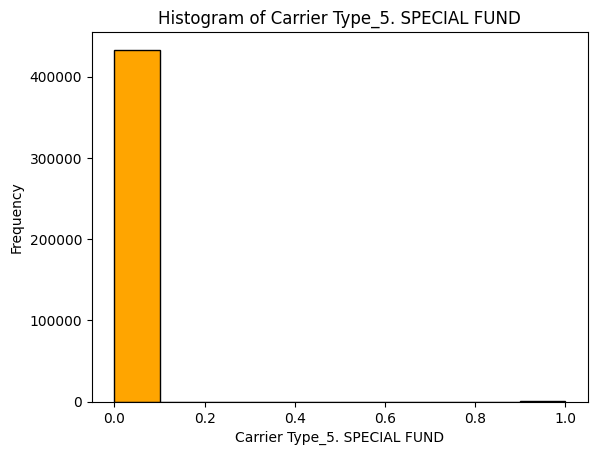

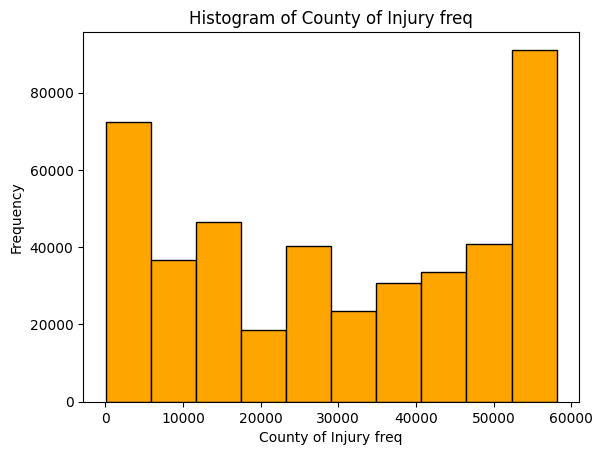

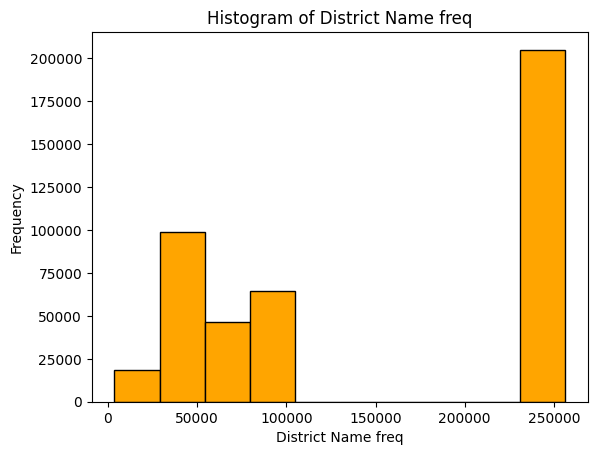

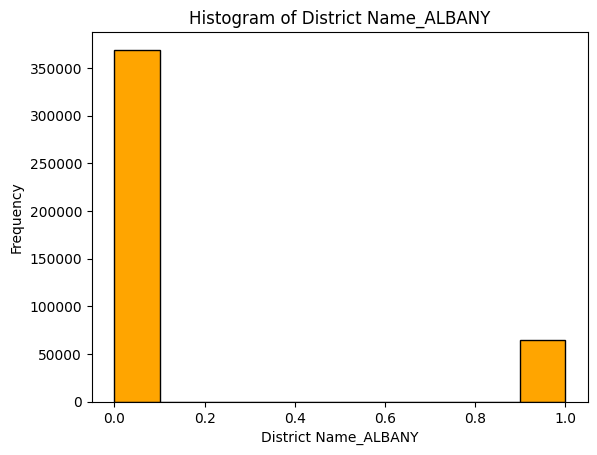

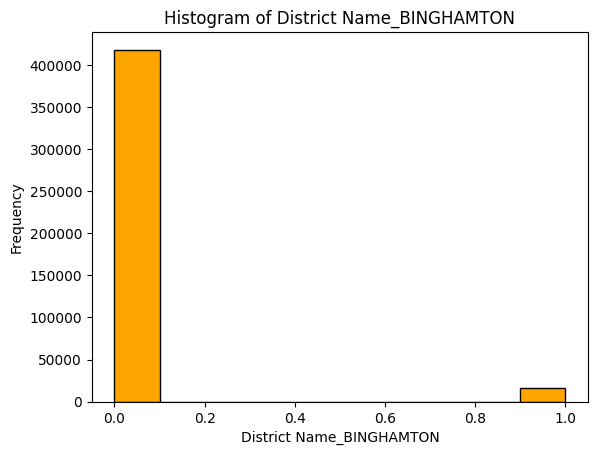

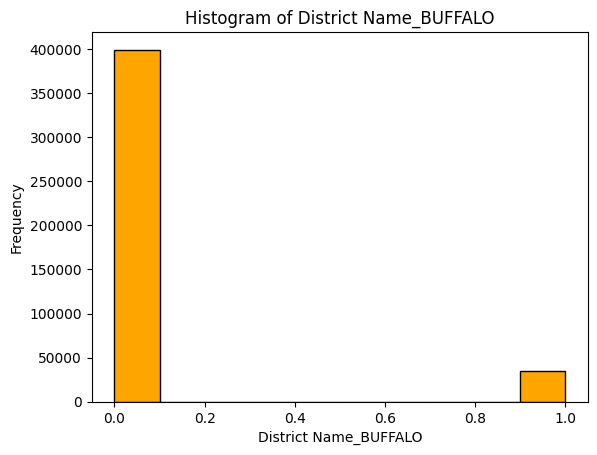

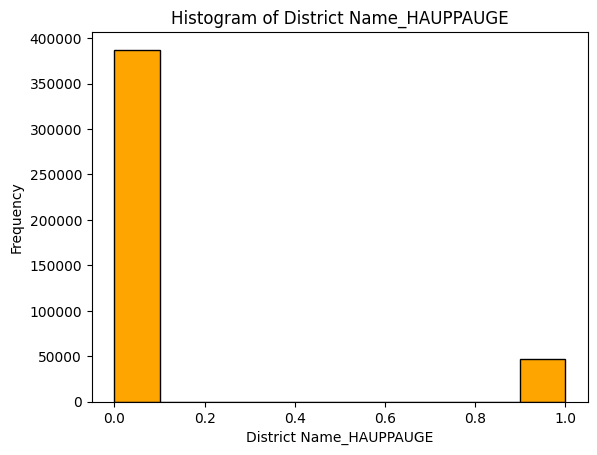

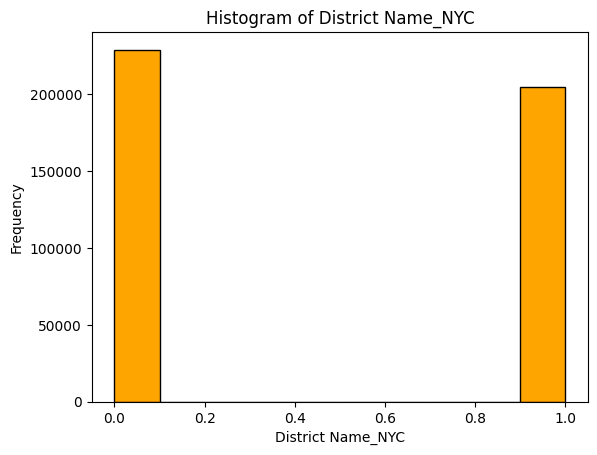

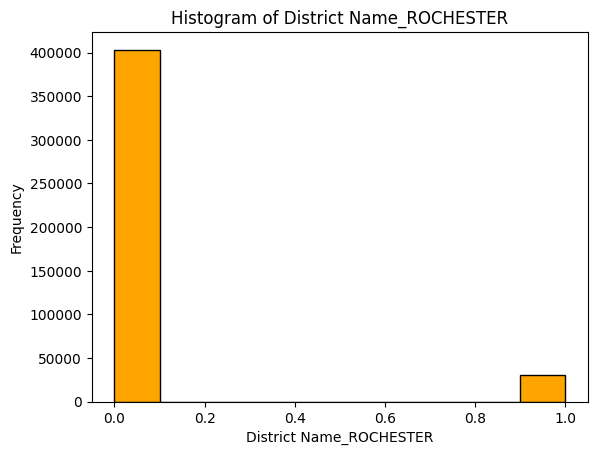

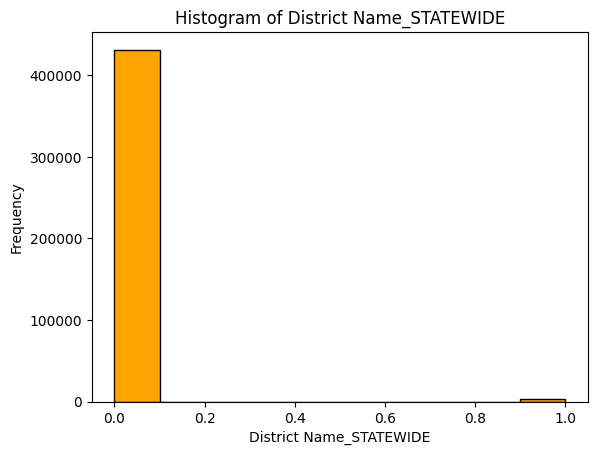

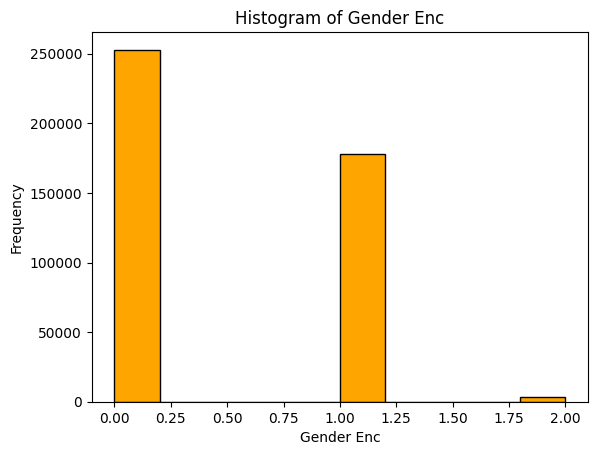

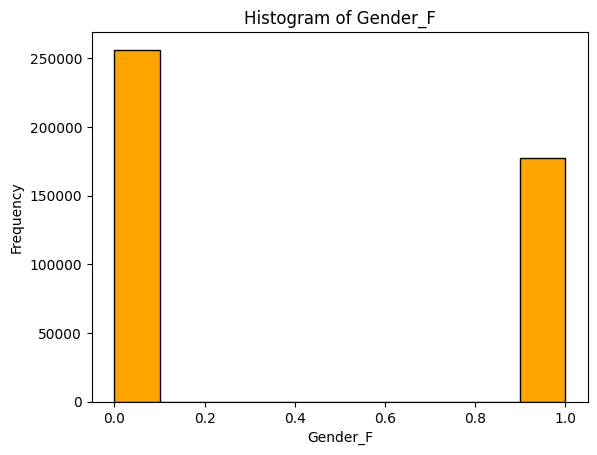

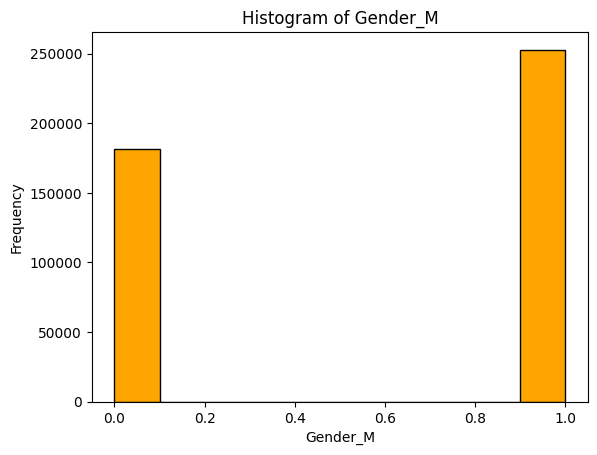

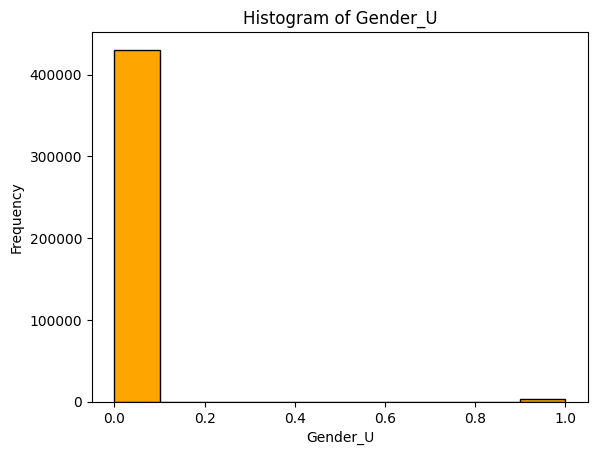

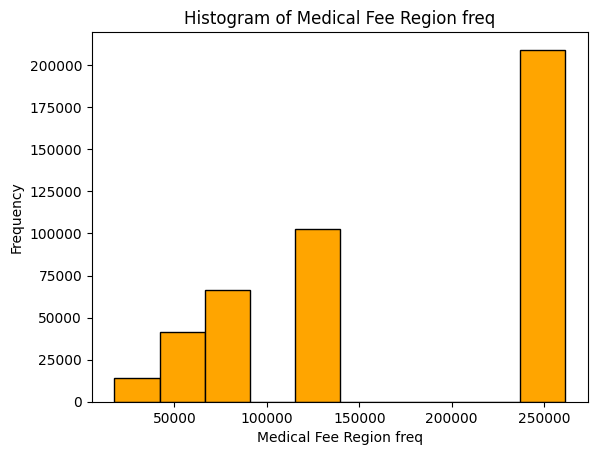

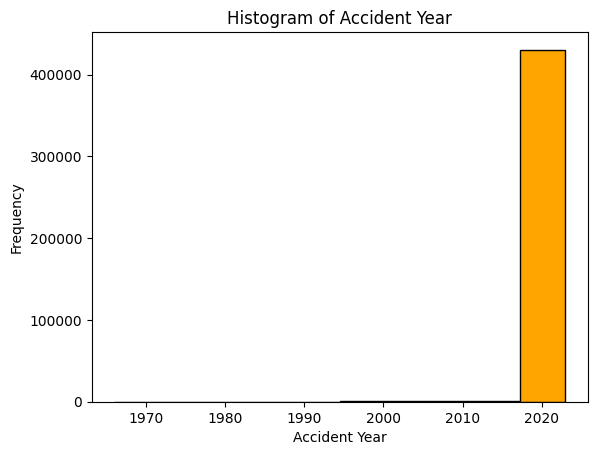

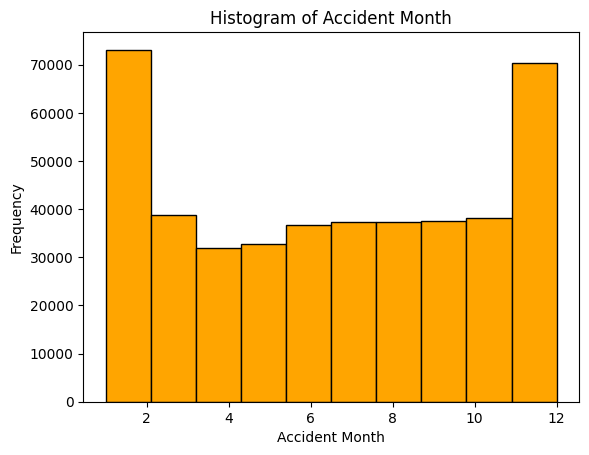

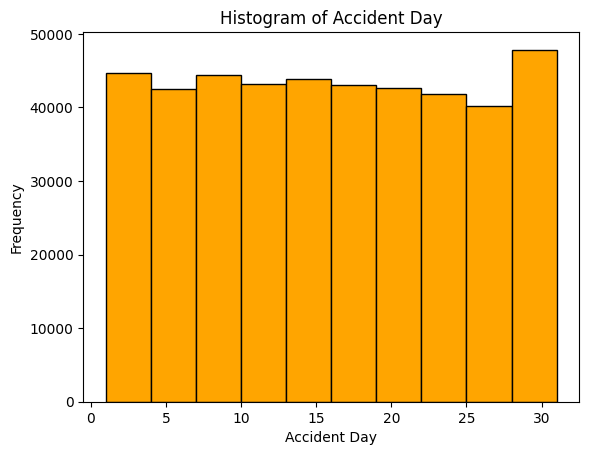

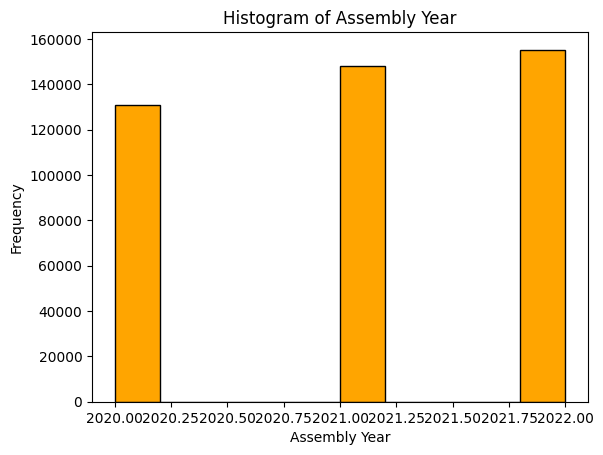

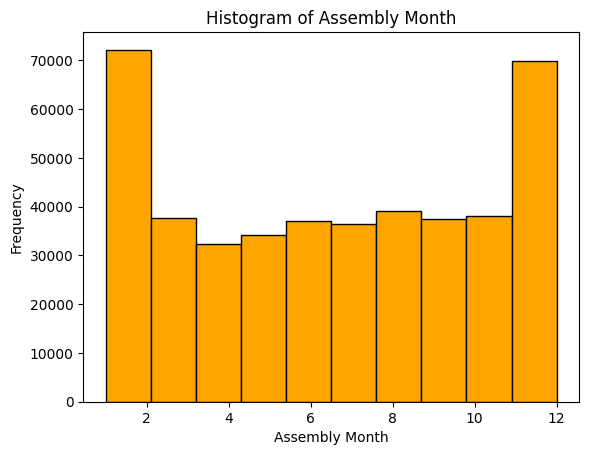

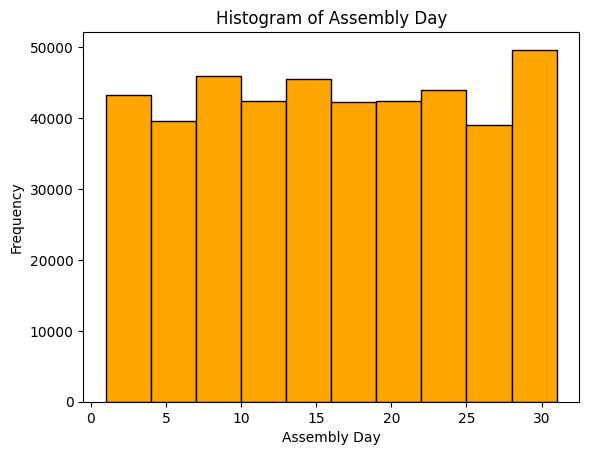

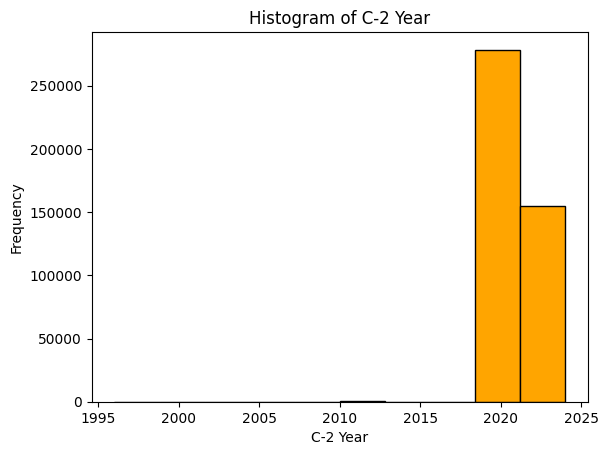

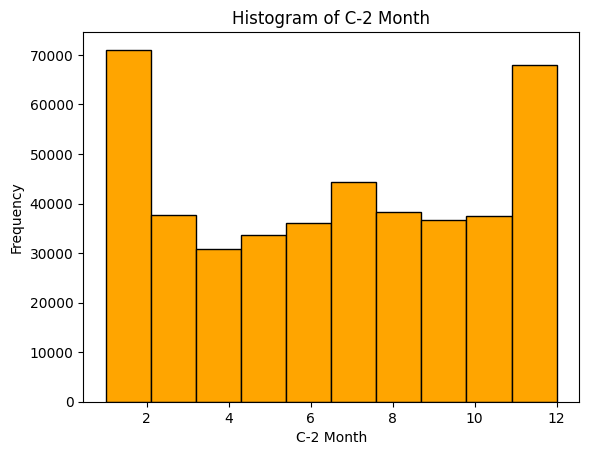

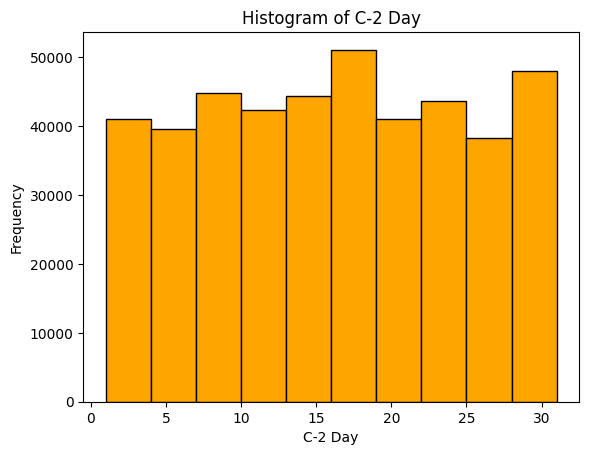

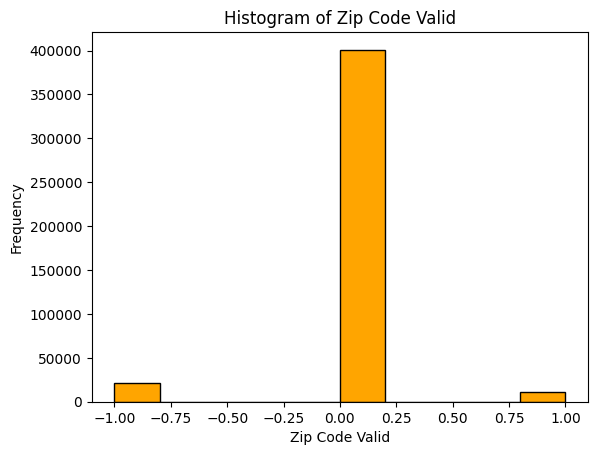

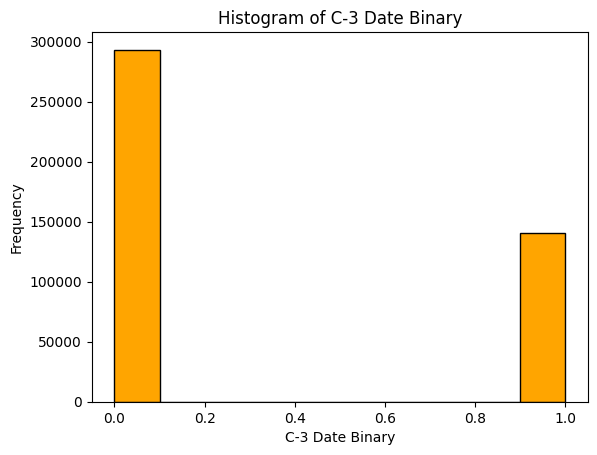

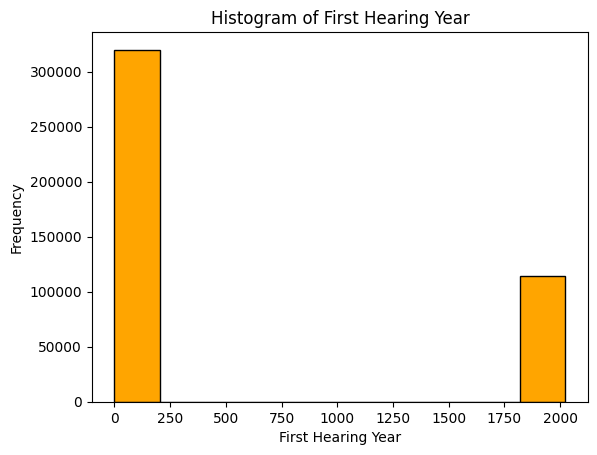

In [147]:
# Loop through each column in the training set (X_train)
# For each numeric column, generate a histogram to visualize its distribution
for column in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        # Plot a histogram for numeric columns, with custom labels and title
        v.plot_histogram(X_train[column], 
                         xlabel=column, 
                         ylabel='Frequency', 
                         title=f'Histogram of {column}')

**Interquartile Range**

In [148]:
# Detect outliers using the IQR (Interquartile Range) method for the training set (X_train)
# The 'missing_threshold' parameter is set to 10, meaning columns with more than 10% missing values will be excluded
p.detect_outliers_iqr(X_train, missing_threshold=10)

Column: Age at Injury - Number of Outliers: 0
Column: Age at Injury - % of Outliers: 0.0% 

Column: Average Weekly Wage - Number of Outliers: 16653
Column: Average Weekly Wage - % of Outliers: 3.8364603107318604% 

Column: Birth Year - Number of Outliers: 21
Column: Birth Year - % of Outliers: 0.004837907075323909% 

Column: COVID-19 Indicator - Number of Outliers: 21089
Column: COVID-19 Indicator - % of Outliers: 4.858410586262187% 

Column: IME-4 Count - Number of Outliers: 101668
Column: IME-4 Count - % of Outliers: 23.42192078733482% 

Column: Industry Code - Number of Outliers: 79108
Column: Industry Code - % of Outliers: 18.224626329272564% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of Outliers: 0.0% 

Column: WCIO Part Of Body Code - Number of Outliers: 69727
Column: WCIO Part Of Body Code - % of Outliers: 16

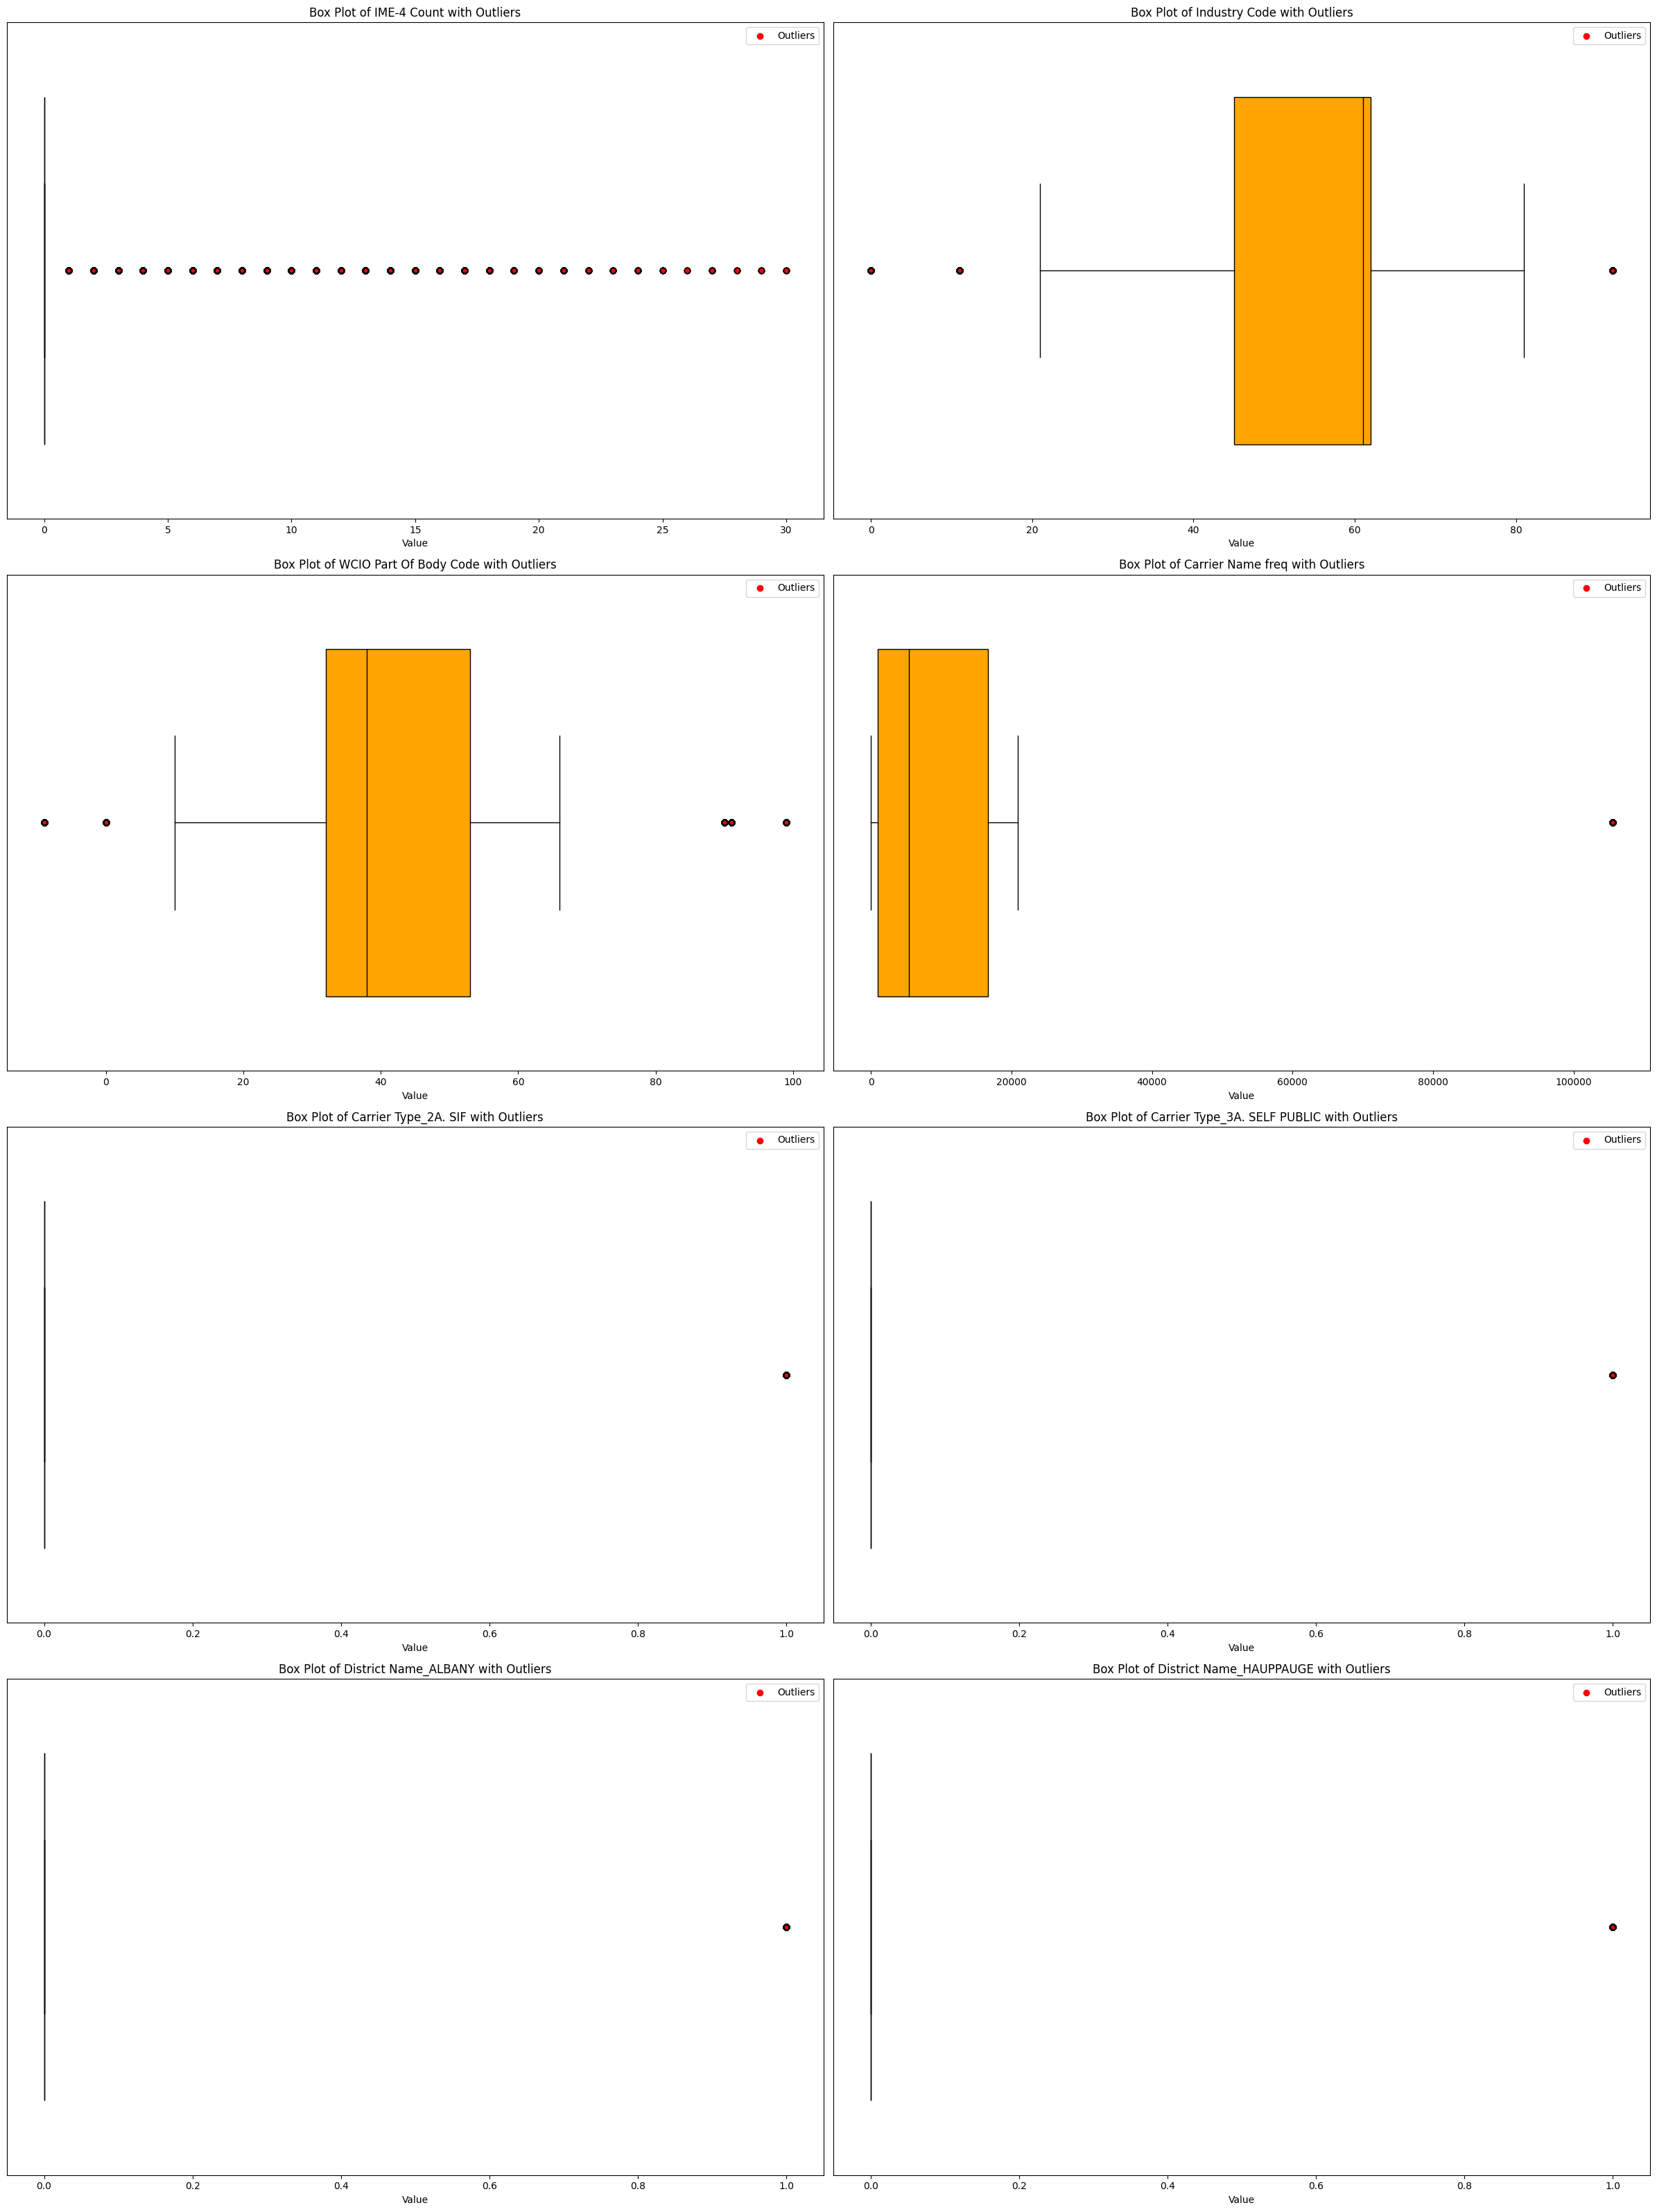

In [149]:
# Create boxplots for a selected set of columns in the training set (X_train)
columns = ['IME-4 Count', 'Industry Code', 'WCIO Part Of Body Code', 
           'Carrier Name freq', 'Carrier Type_2A. SIF', 
           'Carrier Type_3A. SELF PUBLIC', 'District Name_ALBANY', 
           'District Name_HAUPPAUGE']

v.boxplot_out(X_train, columns = columns, ncols = 2) # ncols = 2 = 2 columns

Does not make sense to apply log to some of the `Code` and binary columns and not to others. It appears like there is a carrier that is much more frequent than others. Let's take a look at this and apply log on `IME-4 Count`.

In [150]:
X_train['Carrier Name freq'].value_counts()

Carrier Name freq
105588    84402
20906     16753
16643     13407
16274     13052
13556     10813
          ...  
82           73
84           67
86           66
79           62
67           52
Name: count, Length: 418, dtype: int64

Significant difference between Carrier Name freq 105588, with 84402 observations to Carrier Name freq 20906, with only 16753. Nonetheless, it does not make sense to apply log to a categorical value.

In [151]:
# Apply a log transformation to the 'IME-4 Count' column to reduce skewness and make the data more normally distributed
# Adding 1 before applying log ensures that zeros do not cause errors

X_train['IME-4 Count Log'] = np.log(X_train['IME-4 Count'] + 1)

In [152]:
# Apply a log transformation to the 'IME-4 Count'column in the validation set
# to reduce skewness and make the data more normally distributed

X_val['IME-4 Count Log'] = np.log(X_val['IME-4 Count'] + 1)

In [153]:
test['IME-4 Count Log'] = np.log(test['IME-4 Count'] + 1)

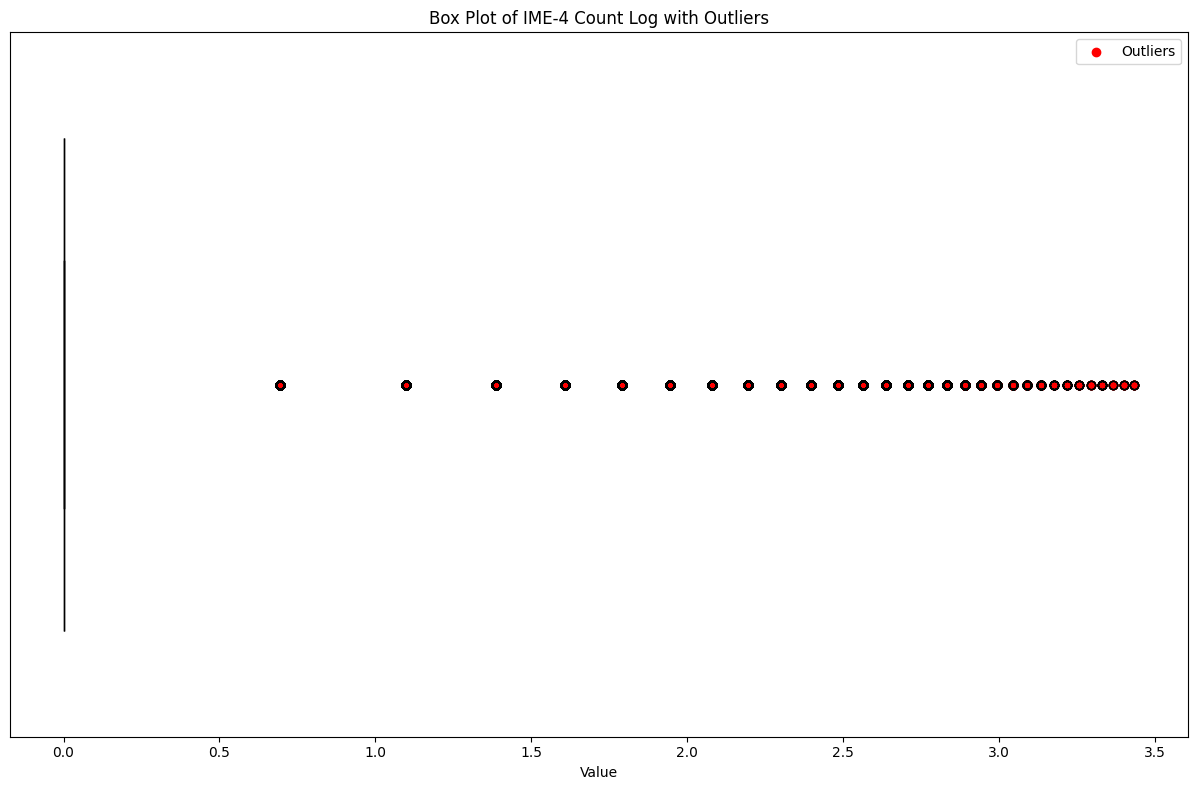

In [154]:
# Create a boxplot for the 'IME-4 Count Log' column in the training set (X_train)
columns = ['IME-4 Count Log']

v.boxplot_out(X_train, columns = columns, ncols = 2)

Still show outliers. Keep for now and choose in feature selection.

## 3.6 Visualisations
Visualizations are powerful tools for exploring and understanding data in machine learning projects. They help identify patterns, relationships, and anomalies while providing insights into feature distributions and model performance. Effective visualizations can guide decision-making during data preprocessing, feature selection, and evaluation.

<a href="#top">Top &#129033;</a>

In [155]:
# Concatenate the training features (X_train) and the target variable (y_train) along columns (axis=1)
all_train = pd.concat([X_train, y_train], axis=1)

# Display the first two rows of the combined DataFrame
all_train.head(2)

,Age at Injury,Average Weekly Wage,Birth Year,COVID-19 Indicator,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Alternative Dispute Resolution freq,Alternative Dispute Resolution Enc,Attorney/Representative Bin,Carrier Name freq,Carrier Type freq,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,County of Injury freq,District Name freq,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,Gender Enc,Gender_F,Gender_M,Gender_U,Medical Fee Region freq,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,Zip Code Valid,Zip Code Numbers,C-3 Date Binary,First Hearing Year,IME-4 Count Log,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5898863,27.0,0.000,1994.0,0,0.0,61.0,67.0,52.0,25.0,1.0,540160,0,0,424,116464,0,0,1,0,0,23266,38428,0,0,0,0,0,1,0,0,0,1,0,83199,2022,1,13,2022,1,14,2022.0,1.0,14.0,0,14612,0,0,0.000000,2
6040041,58.0,1418.524,1963.0,0,2.0,48.0,99.0,59.0,-9.0,3.0,540160,0,1,7529,116464,0,0,1,0,0,51039,256418,0,0,0,0,1,0,0,1,1,0,0,17576,2022,7,17,2022,7,19,2022.0,7.0,19.0,0,07601,1,2023,1.098612,4


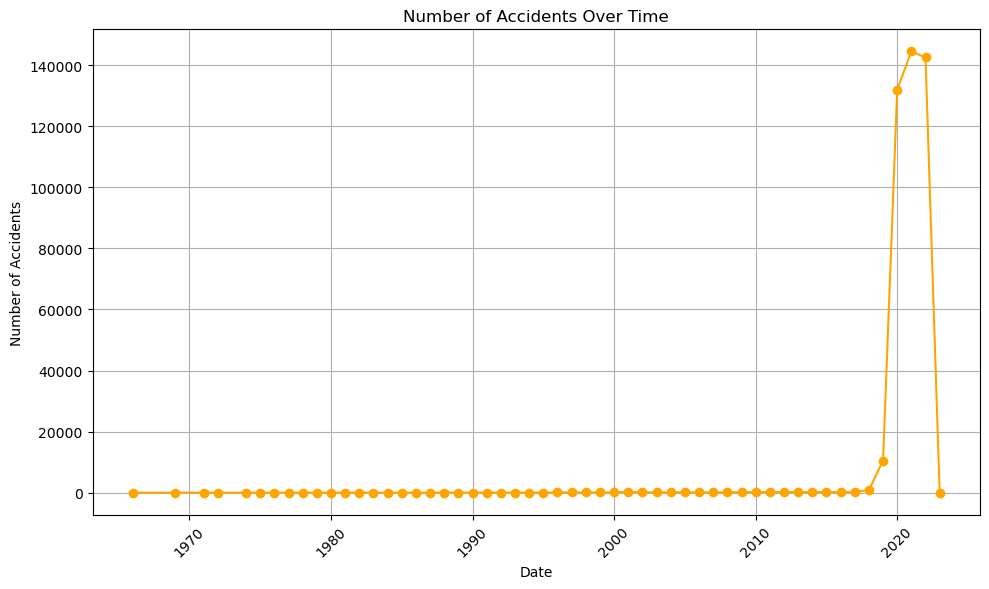

In [156]:
# Count the occurrences of each 'Accident Year' in the 'all_train' DataFrame and sort by index (year)
accident_counts = all_train['Accident Year'].value_counts().sort_index()

# Use the new function in the v file to plot the line graph
v.plot_line(x=accident_counts.index,
    y=accident_counts.values,
    xlabel='Date',
    ylabel='Number of Accidents',
    title='Number of Accidents Over Time')

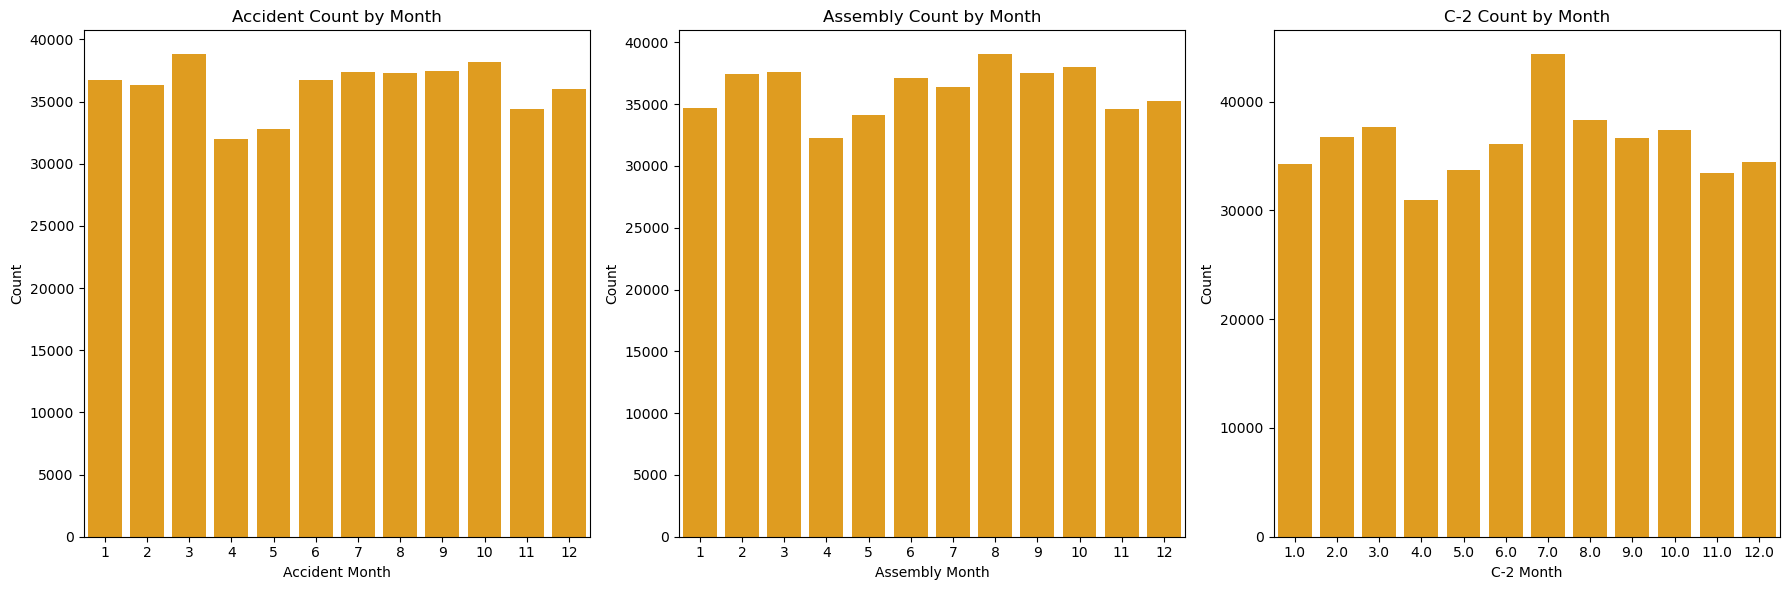

In [157]:
# Define the columns to plot, titles, x-axis labels, and y-axis labels
columns = ['Accident Month', 'Assembly Month', 'C-2 Month']
titles = ['Accident Count by Month', 'Assembly Count by Month', 'C-2 Count by Month']
xlabels = ['Accident Month', 'Assembly Month', 'C-2 Month']
ylabels = ['Count', 'Count', 'Count']

# Call the new function to plot the subplots
v.plot_subplots(data=all_train, columns=columns, titles=titles, xlabels=xlabels, ylabels=ylabels)

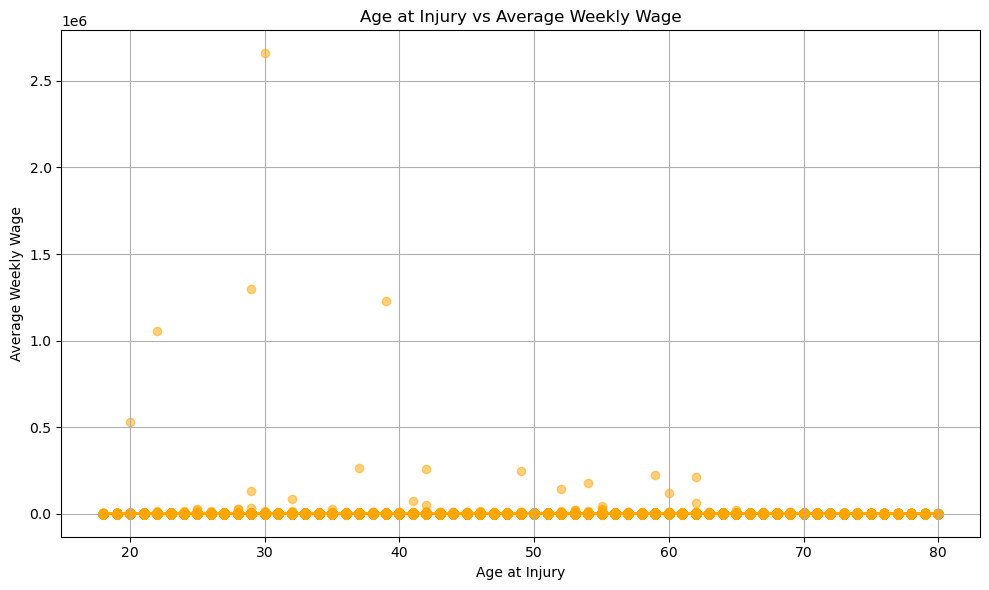

In [158]:
# Call the new function to create the regression plot
v.plot_regression(data=all_train,
    x='Age at Injury',
    y='Average Weekly Wage',
    xlabel='Age at Injury',
    ylabel='Average Weekly Wage',
    title='Age at Injury vs Average Weekly Wage')

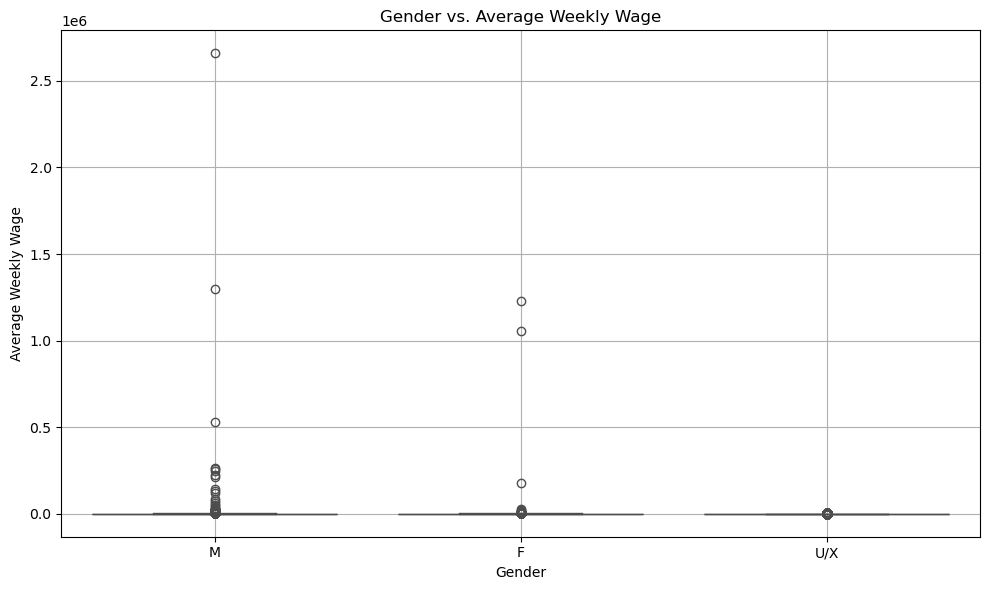

In [159]:
# Use the new function to create the boxplot
v.plot_boxplot(data=all_train,
    x='Gender Enc',
    y='Average Weekly Wage',
    xlabel='Gender',
    ylabel='Average Weekly Wage',
    title='Gender vs. Average Weekly Wage',
    xticks_labels=['M', 'F', 'U/X'])  # Custom labels for the x-axis

In [160]:
# como o carrier type foi encoded os labels deste gráfico ficam um pouco estranhos

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=all_train, x='Carrier Type freq', y='Age at Injury')
# plt.xticks(ticks=[3, 3, 962, 1615, 52139, 109871, 120156, 280879], 
#            labels=['']) 
# plt.title('Carrier Type vs. Age at Injury')
# plt.xlabel('Carrier Type')
# plt.ylabel('Age at Injury')
# plt.xticks(rotation=30) 
# plt.grid(True)
# plt.show()

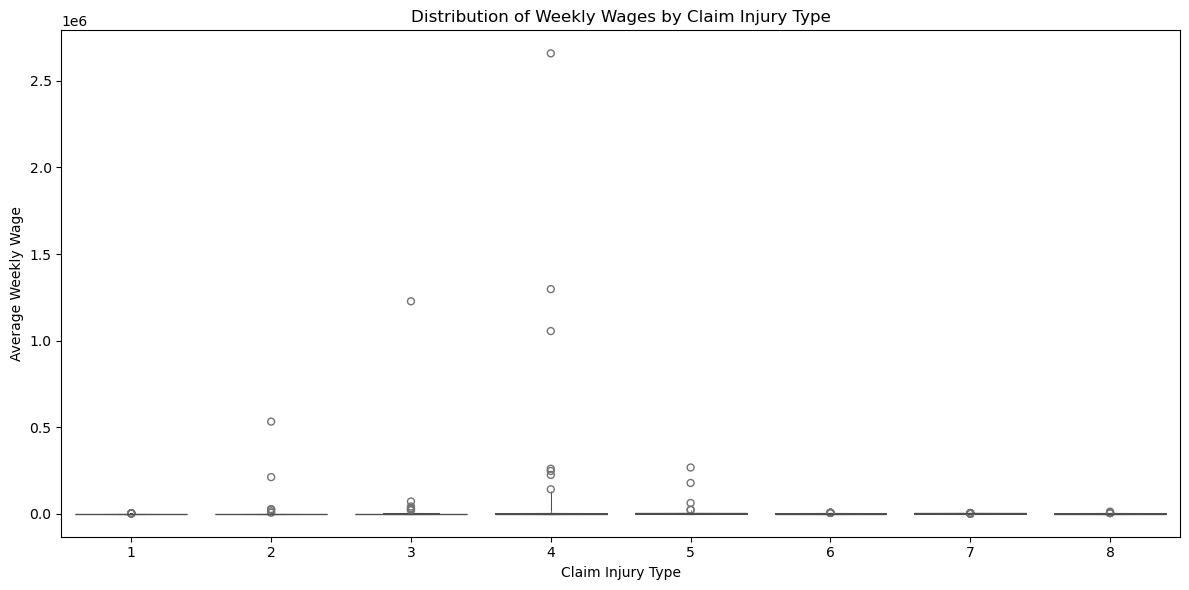

In [161]:
# Use the new function to create the boxen plot
v.plot_boxenplot(data=all_train,
    x='Claim Injury Type',
    y='Average Weekly Wage',
    xlabel='Claim Injury Type',
    ylabel='Average Weekly Wage',
    title='Distribution of Weekly Wages by Claim Injury Type')

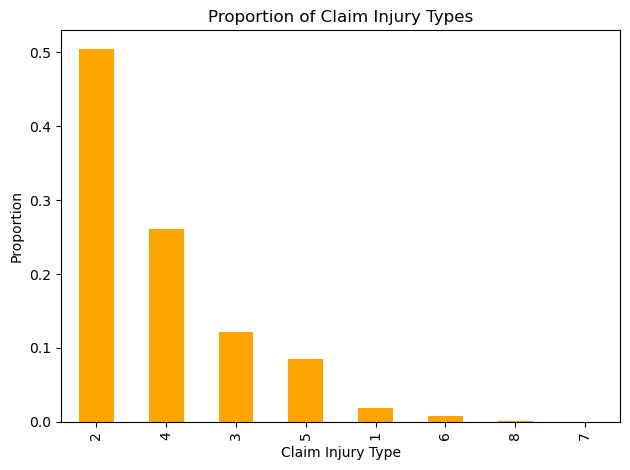

In [162]:
# Use the new function to create the bar plot
v.plot_bar(data=all_train,
    column='Claim Injury Type',
    xlabel='Claim Injury Type',
    ylabel='Proportion',
    title='Proportion of Claim Injury Types')

# 4. Feature Selection
Feature selection is the process of identifying the most relevant features in a dataset to improve model performance and efficiency. By reducing the number of features, it helps minimize overfitting, enhance interpretability, and decrease computational costs without compromising accuracy.

<a href="#top">Top &#129033;</a>

**Split Numerical and Categorical Variables**

In [155]:
# List of numerical columns to be used for numerical analysis or modeling
num = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 
       'IME-4 Count', 'Number of Dependents', 'Accident Year', 
       'Accident Month', 'Accident Day', 'Assembly Year', 
       'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 
       'C-2 Day', 'First Hearing Year', 'IME-4 Count Log']

# List of binary columns to be used for categorical analysis or modeling
bin_or3_class = ['Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF',
          'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5. SPECIAL FUND',
          'District Name_ALBANY', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 
          'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE',
          'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'C-3 Date Binary',
          'Alternative Dispute Resolution Enc', 'Gender Enc']

# List of categorical columns to be used for categorical analysis or modeling
categ = ['Industry Code','WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
         'WCIO Part Of Body Code', 'Alternative Dispute Resolution freq', 
         'Carrier Name freq', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 
         'Medical Fee Region freq', 'Zip Code Numbers']


## 4.1 Scaling
Scaling is a preprocessing step in machine learning that adjusts the range of numerical features to ensure they are comparable and appropriately handled by algorithms. Many models, perform better when features are on a similar scale.

<a href="#top">Top &#129033;</a>

**Standard Scaler**

In [156]:
# Initialize the StandardScaler to standardize the numerical features
standard = StandardScaler()

In [157]:
# Standardize numerical features to have a mean of 0 and a standard deviation of 1, 
# Standardizing the training set
X_train_num_SS = standard.fit_transform(X_train[num])
X_train_num_SS = pd.DataFrame(X_train_num_SS, columns=num, index=X_train.index)

# Standardizing the validation set using the same scaler
X_val_num_SS = standard.transform(X_val[num])
X_val_num_SS = pd.DataFrame(X_val_num_SS, columns=num, index=X_val.index)

# Standardizing the test set using the same scaler
test_num_SS = standard.transform(test[num])
test_num_SS = pd.DataFrame(test_num_SS, columns=num, index=test.index)

In [158]:
# Standardize numerical features to have a mean of 0 and a standard deviation of 1, 
# Standardizing the training set categorical features
X_train_categ_SS = standard.fit_transform(X_train[categ])
X_train_categ_SS = pd.DataFrame(X_train_categ_SS, columns=categ, index=X_train.index)

# Standardizing the validation set categorical features using the same scaler
X_val_categ_SS = standard.transform(X_val[categ])
X_val_categ_SS = pd.DataFrame(X_val_categ_SS, columns=categ, index=X_val.index)

# Standardizing the test set categorical features using the same scaler
test_categ_SS = standard.transform(test[categ])
test_categ_SS = pd.DataFrame(test_categ_SS, columns=categ, index=test.index)

**MinMax Scaler**

In [159]:
# Initialize the MinMaxScaler to scale the numerical features between 0 and 1
minmax = MinMaxScaler()

In [160]:
# Normalize numerical features to a range of [0, 1] using Min-Max scaling.
# Applying Min-Max scaling to the training set numerical features
X_train_num_MM = minmax.fit_transform(X_train[num])
X_train_num_MM = pd.DataFrame(X_train_num_MM, columns=num, index=X_train.index)

# Transforming the validation set numerical features using the same scaler
X_val_num_MM = minmax.transform(X_val[num])
X_val_num_MM = pd.DataFrame(X_val_num_MM, columns=num, index=X_val.index)

# Transforming the test set numerical features using the same scaler
test_num_MM = minmax.transform(test[num])
test_num_MM = pd.DataFrame(test_num_MM, columns=num, index=test.index)

In [161]:
# Normalize numerical features to a range of [0, 1] using Min-Max scaling.
# Applying Min-Max scaling to the training set categorical features
X_train_categ_MM = minmax.fit_transform(X_train[categ])
X_train_categ_MM = pd.DataFrame(X_train_categ_MM, columns=categ, index=X_train.index)

# Transforming the validation set categorical features using the same scaler
X_val_categ_MM = minmax.transform(X_val[categ])
X_val_categ_MM = pd.DataFrame(X_val_categ_MM, columns=categ, index=X_val.index)

# Transforming the test set categorical features using the same scaler
test_categ_MM = minmax.transform(test[categ])
test_categ_MM = pd.DataFrame(test_categ_MM, columns=categ, index=test.index)

**Robust Scaler**

In [162]:
# Initialize the RobustScaler to scale the numerical features using the median and interquartile range
robust = RobustScaler()

In [163]:
# Scaling the numerical features in the training set using RobustScaler
X_train_num_RS = robust.fit_transform(X_train[num])
X_train_num_RS = pd.DataFrame(X_train_num_RS, columns=num, index=X_train.index)

# Scaling the numerical features in the validation set using the fitted RobustScaler
X_val_num_RS = robust.transform(X_val[num])
X_val_num_RS = pd.DataFrame(X_val_num_RS, columns=num, index=X_val.index)

# Scaling the numerical features in the test set using the same fitted RobustScaler
test_num_RS = robust.transform(test[num])
test_num_RS = pd.DataFrame(test_num_RS, columns=num, index=test.index)

In [164]:

# Scaling the categorical features in the training set using RobustScaler
X_train_categ_RS = robust.fit_transform(X_train[categ])
X_train_categ_RS = pd.DataFrame(X_train_categ_RS, columns=categ, index=X_train.index)

# Scaling the categorical features in the validation set using the fitted RobustScaler
X_val_categ_RS = robust.transform(X_val[categ])
X_val_categ_RS = pd.DataFrame(X_val_categ_RS, columns=categ, index=X_val.index)

# Scaling the categorical features in the test set using the same fitted RobustScaler
test_categ_RS = robust.transform(test[categ])
test_categ_RS = pd.DataFrame(test_categ_RS, columns=categ, index=test.index)

Join Categorical and Binary Variables of the chosen scaler

In [165]:
# Combine the robust-scaled categorical features with the binary classification features in the training set
X_train_categ_bin_RS = pd.concat([X_train_categ_RS, X_train[bin_or3_class]], axis=1)

# Combine the robust-scaled categorical features with the binary classification features in the validation set
X_val_categ_bin_RS = pd.concat([X_val_categ_RS, X_val[bin_or3_class]], axis=1)

# Combine the robust-scaled categorical features with the binary classification features in the test set
test_categ_bin_RS = pd.concat([test_categ_RS, test[bin_or3_class]], axis=1)

### Summary of Scaling Methods for Numerical Data

#### 1. **RobustScaler**
- **Ideal for handling outliers**: The **RobustScaler** is best when working with data that contains outliers, as it scales based on the interquartile range (IQR), making it less sensitive to extreme values.
- **Example**: Features like **'IME-4 Count'** have large outliers that could distort the scaling. **RobustScaler** mitigates this issue.

#### 2. **StandardScaler**
- **Works well for normally distributed data**: The **StandardScaler** standardizes data by centering it with a mean of zero and scaling it by the standard deviation. It is effective when our data is normally distributed.
- **Example**: The feature **'Birth Year'** has a normal distribution and is well-centered using this scaler.

#### 3. **MinMaxScaler**
- **Sensitive to outliers**: The **MinMaxScaler** compresses data into a 0–1 range, but is vulnerable to outliers, which can significantly skew the result. It's most effective when applied to features with moderate ranges or when the model is sensitive to the feature range.
- **Example**: The **'Industry Code'** feature, with a moderate range, benefits from this transformation.

---

### Scaling Results Summary:

| Feature | **RobustScaler** | **StandardScaler** | **MinMaxScaler** |
|---------|------------------|--------------------|------------------|
| **Age at Injury** | Median-based scaling to handle outliers | Scaled to have mean = 0, std = 1 | Values between 0 and 1 |
| **Average Weekly Wage** | Robust to large outliers | Scaled but affected by outliers | Most values compressed due to extreme values |
| **Birth Year** | Handles skew in birth year data | Centered around mean | No major issues |
| **IME-4 Count** | Effective for highly skewed counts | Still influenced by outliers | Compression due to large counts |
| **Industry Code** | Efficient scaling due to moderate range | Normalized for centered values | All values mapped to 0–1 range |

---

### Recommendation:
Given that our dataset contains outliers in variables like **'IME-4 Count'** and **'Average Weekly Wage'**, the **RobustScaler** is the best choice for this scenario, in our opinion. It effectively handles skewed data without the influence of outliers. However, if we require data centering for algorithms that depend on normalized features, we can also consider using the **StandardScaler** after addressing outliers.


For Feature selection we will use:

In [166]:
# Display the first row of the numerically scaled training set using RobustScaler
X_train_num_RS.head(1)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Year,Accident Month,Accident Day,Assembly Year,Assembly Month,Assembly Day,C-2 Year,C-2 Month,C-2 Day,First Hearing Year,IME-4 Count Log
Claim Identifier,,,,,,,,,,,,,,,,
5898863,-0.652174,0.0,0.727273,0.0,-0.5,0.5,-0.857143,-0.133333,0.5,-1.0,-0.133333,0.5,-1.0,-0.133333,0.0,0.0


In [167]:
# Display the first row of the categorical and binary transformed training set using RobustScaler
X_train_categ_bin_RS.head(1)

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Alternative Dispute Resolution freq,Carrier Name freq,Carrier Type freq,County of Injury freq,District Name freq,Medical Fee Region freq,Zip Code Numbers,Attorney/Representative Bin,Carrier Type_1A. PRIVATE,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5. SPECIAL FUND,District Name_ALBANY,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,Gender_F,Gender_M,Gender_U,Zip Code Valid,C-3 Date Binary,Alternative Dispute Resolution Enc,Gender Enc
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5898863,0.0,0.23913,0.071429,-0.619048,0.0,-0.321435,0.0,-0.15526,-0.198645,-0.253327,1.175381,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## 4.2 Filter-Based Methods
Filter-based methods evaluate the relevance of features independently of the model using statistical measures like correlation, Chi-square tests, and mutual information. This section explores how these methods help reduce dimensionality, improve model performance, and prevent overfitting by selecting the most informative features.

<a href="#top">Top &#129033;</a>

**Variance Threshold**

In [176]:
# Calculate the variance of the scaled training data after applying Robust scaling
# Variance provides a measure of how spread out the values are around the mean for each feature
X_train_num_RS.var()

Age at Injury            0.346220
Average Weekly Wage     39.288760
Birth Year               0.383779
IME-4 Count              3.684739
Number of Dependents     0.250401
Accident Year            0.742689
Accident Month           0.243886
Accident Day             0.343106
Assembly Year            0.164060
Assembly Month           0.327724
Assembly Day             0.339202
C-2 Year                 0.278068
C-2 Month                0.321591
C-2 Day                  0.330020
First Hearing Year       0.194054
IME-4 Count Log          0.358882
dtype: float64

In [177]:
# Set the variance threshold for feature selection (0.1 in this case)
# Features with variance below this threshold will be removed, as they are considered not useful for the model
threshold = 0.1

# Initialize the VarianceThreshold selector with the specified threshold
selector = VarianceThreshold(threshold=threshold)

# Apply the selector to the scaled training data (X_train_RS) to retain only the high-variance features
X_train_high_variance = selector.fit_transform(X_train_num_RS)

# Print the number of features before applying the variance threshold
print(f"Number of features before variance threshold: {X_train_num_RS.shape[1]}")

# Print the number of features after applying the variance threshold
print(f"Number of features after variance threshold: {X_train_high_variance.shape[1]}")

Number of features before variance threshold: 16
Number of features after variance threshold: 16


**Spearman Correlation Matrix**

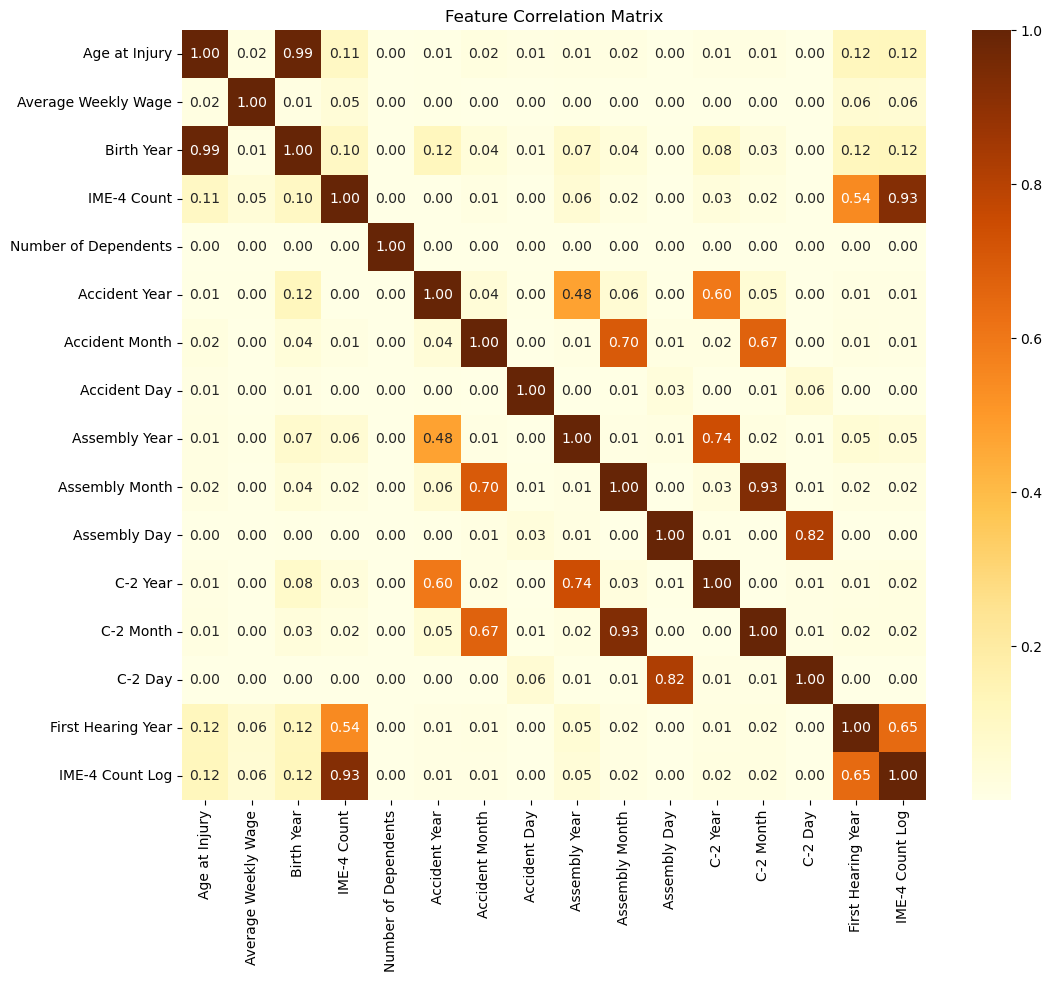

In [178]:
# Visualize the correlation matrix to identify relationships between numerical features
fs.correlation_matrix(X_train_num_RS)

**High Correlations**

| Var 1 | Var 2 | Correlation |
| ----- | ----- | ----------- |
| Birth Year | Age at Injury | 0.99 |
| C-2 Month | Assembly Month | 0.93 |
| IME-4 Count | IME-4 Count Log | 0.93|
| C-2 Day | Assembly Day | 0.82 |


**Chi Squared Test**

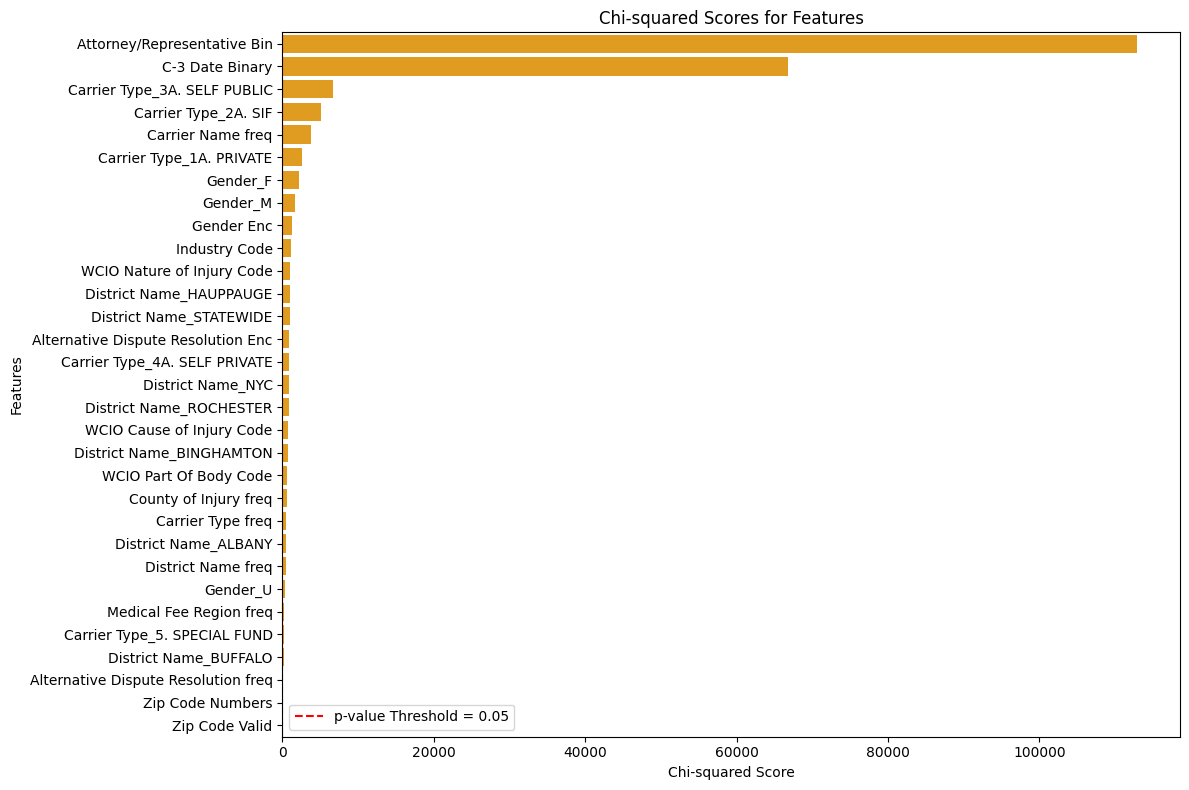


Initial Features: 31

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution freq', 'Carrier Name freq', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Zip Code Numbers', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5. SPECIAL FUND', 'District Name_ALBANY', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'C-3 Date Binary', 'Alternative Dispute Resolution Enc', 'Gender Enc']

Decision for Categorical Features (p-value < threshold): 28

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name freq', 'Carrier Type freq', 'County 

In [172]:
# Perform the Chi-squared test to assess the independence between categorical features and the target variable
fs.chi_squared(X_train_categ_bin_RS, y_train)

**Not Selected Features**

| Var | Chi2 Score | P-value |
| ----- | ----- | ----------- |
| Alternative Dispute Resolution | 8.129528 | 0.32131 |
| Zip Code Valid | 0.480012 | 0.774187 |
| Zip Code Numbers | 4.048392 | 0.774187 |


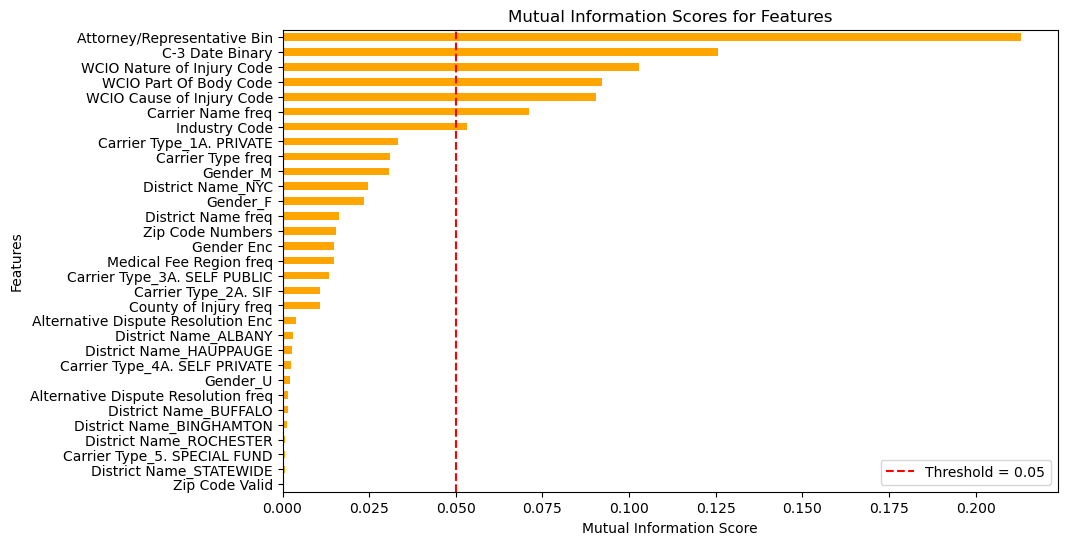


Initial Features: 31 

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution freq', 'Carrier Name freq', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Zip Code Numbers', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5. SPECIAL FUND', 'District Name_ALBANY', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'C-3 Date Binary', 'Alternative Dispute Resolution Enc', 'Gender Enc']

Decision for Categorical Features (MI Score >= 0.05): 7 

['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Name freq', 'Attorney/Representative Bin', 

In [180]:
# Compute the mutual information between categorical features in X_train and the target variable y_train, filtering features with a score above 0.05
fs.mutual_info(X_train_categ_bin_RS, y_train, threshold = 0.05)

## 4.3 Wrapper Methods
Unlike filter methods, which assess features independently, wrapper methods evaluate the effectiveness of feature subsets by measuring the model’s performance, making them more computationally expensive but often more accurate in selecting relevant features.

<a href="#top">Top &#129033;</a>

In [181]:
#len(X_train[num].columns)

**RFE**

In [ ]:
# Perform Recursive Feature Elimination (RFE) to select the top features based on their importance for a logistic regression model
n_features = np.arange(5, len(X_train_num_RS.columns) + 1)
model = LogisticRegression()
fs.rfe(X_train_num_RS, y_train, n_features = n_features, model = model)

# ~45 min to run

In [ ]:
# Perform Recursive Feature Elimination (RFE) to select the top features based on their importance for a Random Forest model
n_features = np.arange(5, len(X_train_num_RS.columns) + 1)
model = RandomForestClassifier()
fs.rfe(X_train_num_RS, y_train, n_features = n_features, model = model)

# ~2h to run

Classification Report for 5 features:

              precision    recall  f1-score   support

           1       0.77      0.19      0.30      8108
           2       0.86      0.99      0.92    218985
           3       0.95      0.54      0.69     52736
           4       1.00      0.96      0.98    113543
           5       1.00      1.00      1.00     37098
           6       1.00      1.00      1.00      3209
           7       1.00      1.00      1.00        74
           8       0.99      0.87      0.93       319

    accuracy                           0.91    434072
   macro avg       0.95      0.82      0.85    434072
weighted avg       0.92      0.91      0.90    434072

Macro Avg F1 Score for 5 features: 0.8515

Classification Report for 6 features:

              precision    recall  f1-score   support

           1       0.91      0.51      0.66      8108
           2       0.91      0.99      0.95    218985
           3       0.94      0.67      0.79     52736
           

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Accident Year',
 'Accident Month',
 'Accident Day',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year',
 'IME-4 Count Log']

**RFE LR Features**

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Accident Year',
 'Accident Month',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year',
 'IME-4 Count Log']

**RFE RF Features**

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Accident Year',
 'Accident Month',
 'Accident Day',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year',
 'IME-4 Count Log']

## 4.4 Embedded Methods
These methods use algorithms that inherently select features as part of the model’s learning process. Embedded methods are computationally efficient and tend to be more accurate than filter methods, as they consider feature interactions and model performance simultaneously.

<a href="#top">Top &#129033;</a>

**Lasso**

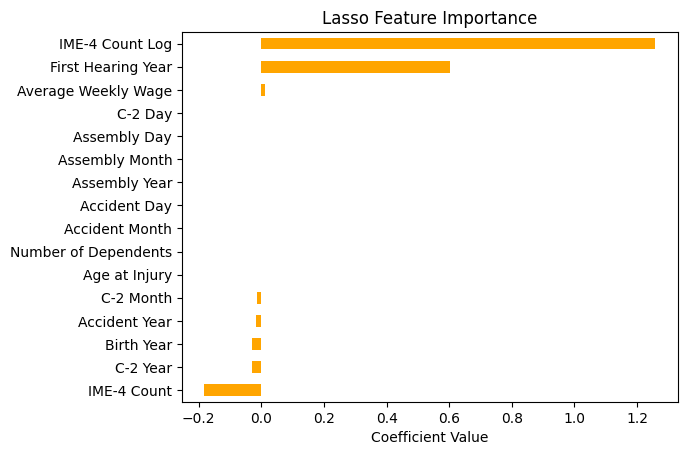


Initial Features: 16

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year', 'IME-4 Count Log']

Decision for Numerical Features (lasso ≠ 0): 8

['Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Accident Year', 'C-2 Year', 'C-2 Month', 'First Hearing Year', 'IME-4 Count Log']


In [173]:
# Perform Lasso regression for feature selection to identify important features based on their coefficients
fs.lasso(X_train_num_RS, y_train, alpha = 0.01)

**Extra Trees Classifier**

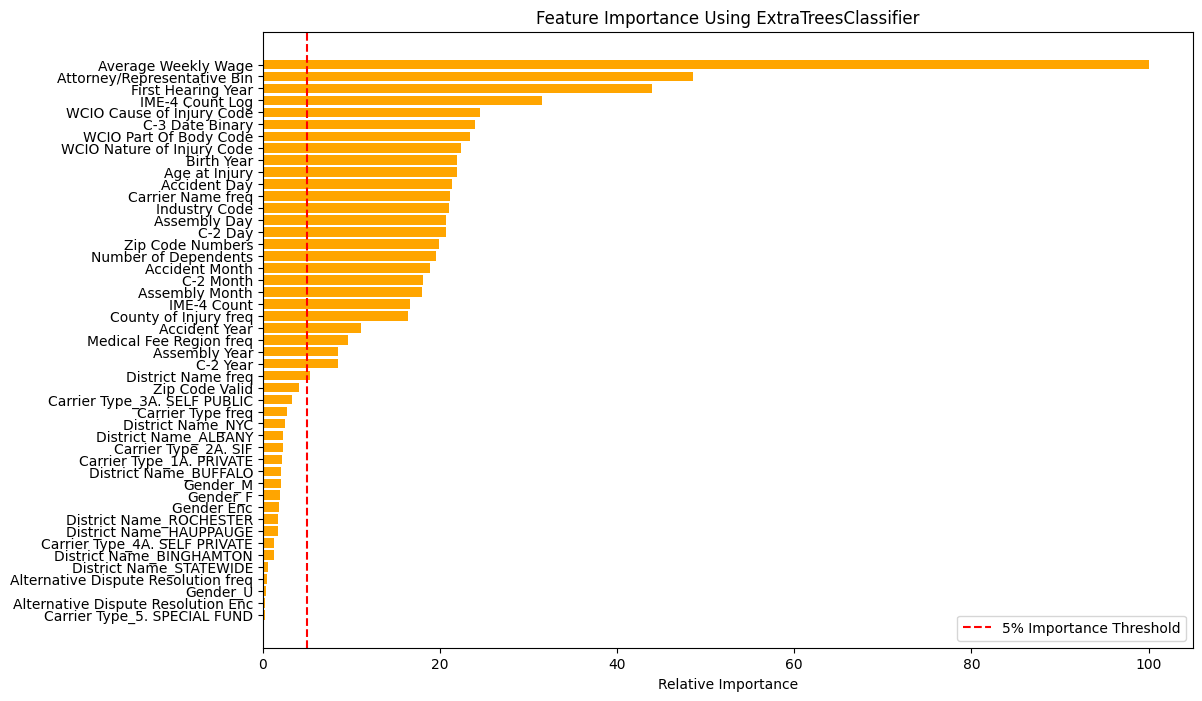


Initial Features: 47

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day', 'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year', 'IME-4 Count Log', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution freq', 'Carrier Name freq', 'Carrier Type freq', 'County of Injury freq', 'District Name freq', 'Medical Fee Region freq', 'Zip Code Numbers', 'Attorney/Representative Bin', 'Carrier Type_1A. PRIVATE', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5. SPECIAL FUND', 'District Name_ALBANY', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'Gender_F', 'Gender_M', 'Gender_U', 'Zip Code Valid', 'C-3 Date Bina

In [174]:
# Plot feature importance using a Random Forest model to assess the importance of each feature for predicting the target
fs.plot_feature_importance(X_train_num_RS, X_train_categ_bin_RS, y_train, 
                        n_estimators = 250)

**Final Decision**

`Numeric Variables`

| Variable                   | Variance | Correlation | RFE LR | RFE RF | Lasso       | Extra Trees | `Decision` |
|----------------------------|----------|-------------|--------|--------|-------------|-------------|------------|
| Accident Day               | keep     | keep | **discard**| keep      | **discard** | keep    | try          |
| Accident Month             | keep     | keep | keep       | keep      | **discard** | keep    | keep         |
| Accident Year              | keep     | keep | keep       | keep      | keep        | keep    | keep         |
| Age at Injury              | keep     | ?    | keep       | keep      | **discard** | keep    | **discard**  |
| Assembly Day               | keep     | ?    | keep       | keep      | **discard** | keep    | try          |
| Assembly Month             | keep     | ?    | keep       | keep      | **discard** | keep    | **discard**  |
| Assembly Year              | keep     | keep | keep       |**discard**| **discard** | keep    | **discard**  |
| Average Weekly Wage        | keep     | keep | keep       | keep      | keep        | keep    | keep         |
| Birth Year                 | keep     | ?    | keep       | keep      | keep        | keep    | keep         |
| C-2 Day                    | keep     | ?    | keep       | keep      | **discard** | keep    | try          |
| C-2 Month                  | keep     | ?    | keep       | keep      | keep        | keep    | keep         |
| C-2 Year                   | keep     | keep | keep       | keep      | keep        | keep    | keep         |
| First Hearing Year         | keep     | keep | keep       | keep      | keep        | keep    | keep         |
| IME-4 Count                | keep     | ?    | keep       | keep      | keep        | keep    | try          |
| IME-4 Count Log            | keep     | ?    | keep       | keep      | keep        | keep    | try          |
| Number of Dependents       | keep     | keep | **discard**| keep      | **discard** | keep    | **discard**  |

<br>

`Categorical Variables`

| Variable                              | Chi-Squared | MI          | Extra trees | Decision    |
|---------------------------------------|-------------|-------------|-------------|-------------|
| Alternative Dispute Resolution Enc    | keep        | **discard** | **discard** | **discard** |
| Alternative Dispute Resolution freq   | **discard** | **discard** | **discard** | **discard** |
| Attorney/Representative Bin           | keep        | keep        | keep        | keep        |
| C-3 Date Binary                       | keep        | keep        | keep        | keep        |
| Carrier Name freq                     | keep        | keep        | keep        | keep        |
| Carrier Type freq                     | keep        | **discard** | **discard** | **discard** |
| Carrier Type_1A. PRIVATE              | keep        | **discard** | **discard** | **discard** |
| Carrier Type_2A. SIF                  | keep        | **discard** | **discard** | **discard** |
| Carrier Type_3A. SELF PUBLIC          | keep        | **discard** | **discard** | **discard** |
| Carrier Type_4A. SELF PRIVATE         | keep        | **discard** | **discard** | **discard** |
| Carrier Type_5. SPECIAL FUND          | keep        | **discard** | **discard** | **discard** |
| County of Injury freq                 | keep        | **discard** | keep        | try         |
| District Name freq                    | keep        | **discard** | keep        | try         |
| District Name_ALBANY                  | keep        | **discard** | **discard** | **discard** |
| District Name_BINGHAMTON              | keep        | **discard** | **discard** | **discard** |
| District Name_BUFFALO                 | keep        | **discard** | **discard** | **discard** |
| District Name_HAUPPAUGE               | keep        | **discard** | **discard** | **discard** |
| District Name_NYC                     | keep        | **discard** | **discard** | **discard** |
| District Name_ROCHESTER               | keep        | **discard** | **discard** | **discard** |
| District Name_STATEWIDE               | keep        | **discard** | **discard** | **discard** |
| Gender Enc                            | keep        | **discard** | **discard** | **discard** |
| Gender_F                              | keep        | **discard** | **discard** | **discard** |
| Gender_M                              | keep        | **discard** | **discard** | **discard** |
| Gender_U                              | keep        | **discard** | **discard** | **discard** |
| Industry Code                         | keep        | keep        | keep        | keep        |
| Medical Fee Region freq               | keep        | **discard** | keep        | try         |
| WCIO Cause of Injury Code             | keep        | keep        | keep        | keep        |
| WCIO Nature of Injury Code            | keep        | keep        | keep        | keep        |
| WCIO Part Of Body Code                | keep        | keep        | keep        | keep        |
| Zip Code Numbers                      | **discard** | **discard** | keep        | **discard** |
| Zip Code Valid                        | **discard** | **discard** | **discard** | **discard** |



<br> 

`Final Features (Numeric & Categorical)`

| Variable |
| -------- | 
| Accident Month                        | 
| Accident Year                         | 
| Average Weekly Wage                   |  
| Birth Year                            |
| First Hearing Year                    |
| -- |
| Attorney/Representative Bin           |
| C-3 Date Binary                       |
| Carrier Name freq                     |
| Industry Code                         |
| WCIO Cause of Injury Code             |
| WCIO Nature of Injury Code            |
| WCIO Part Of Body Code                | 

| Try |
| -------- | 
| Accident Day                          |
| Assembly Day                          |
| C-2 Day                               |
| IME-4 Count                           |
| IME-4 Count Log                       |
| -------- | 
| County of Injury freq                 |
| District Name freq                    |
| Medical Fee Region freq               |


**Final Features**

In [168]:
# 'final_num' includes selected numerical features for final use
final_num = ['Accident Month', 'Accident Year', 'Average Weekly Wage', 'Birth Year', 'First Hearing Year']

try_num = ['Accident Day', 'Assembly Day', 'C-2 Day', 'IME-4 Count', 'IME-4 Count Log']

In [169]:
# 'final_categ' includes selected categorical features for final use
final_categ = ['Attorney/Representative Bin', 'C-3 Date Binary', 'Carrier Name freq',
               'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
               'WCIO Part Of Body Code']

try_categ = ['County of Injury freq', 'District Name freq', 'Medical Fee Region freq']

In [ ]:
# Creating copies of the scaled numerical features for final processing
X_train_num_final = X_train_num_RS[:]

X_val_num_final = X_val_num_RS[:]

test_num_final = test_num_RS[:]

In [ ]:
# Select the relevant categorical features from the combined training, validation, and test sets
X_train_categ_final = X_train_categ_bin_RS[final_categ]

X_val_categ_final = X_val_categ_bin_RS[final_categ]

test_categ_final = test_categ_bin_RS[final_categ]

**Combine with Feature Selection**

In [174]:
# Combine the selected numerical and categorical features for the training and validation datasets
X_train_final = pd.concat([X_train_num_final, X_train_categ_final], axis=1)

X_val_final = pd.concat([X_val_num_final, X_val_categ_final], axis=1)

test_final = pd.concat([test_num_final, test_categ_final], axis=1)

**Combine without Feature Selection**

In [175]:
# Combine the selected numerical and categorical features for the training and validation datasets
X_train_all = pd.concat([X_train_num_RS, X_train_categ_bin_RS], axis=1)

X_val_all = pd.concat([X_val_num_RS, X_val_categ_bin_RS], axis=1)

test_all = pd.concat([test_num_RS, test_categ_bin_RS], axis=1)

**Check Columns**

In [176]:
# Convert the column names of 'test_final' DataFrame to a set for easy comparison
test_final_columns = set(test_final.columns)

# Convert the column names of 'X_train_final' DataFrame to a set for easy comparison
X_train_final_columns = set(X_train_final.columns)

# Perform set difference to find columns that exist in 'test_final' but not in 'X_train_final'
columns_in_test_not_in_train = test_final_columns - X_train_final_columns

# Display the columns that are present in 'test_final' but not in 'X_train_final'
print("Columns in test_final but not in X_train_final: \n")
print(list(columns_in_test_not_in_train))

Columns in test_final but not in X_train_final: 

[]


# 5. Export
In this section, we export the final processed datasets, which include both numerical and categorical features, for model training, validation, and testing. After performing several preprocessing steps, such as handling missing values, scaling, encoding categorical variables, and feature engineering, the datasets are prepared for machine learning algorithms.

<a href="#top">Top &#129033;</a>

**Export with Feature Selection**

In [ ]:
# Save the final processed datasets for training, validation and testing as CSV files
X_train_final.to_csv('./project_data/x_train_final.csv')

X_val_final.to_csv('./project_data/x_val_final.csv')

test_final.to_csv('./project_data/test_final.csv')

**Export without Feature Selection**

In [ ]:
# Save the final datasets containing both numerical and categorical features for training, validation, and testing as CSV files
X_train_all.to_csv('./project_data/x_train_all.csv')

X_val_all.to_csv('./project_data/x_val_all.csv')

test_all.to_csv('./project_data/test_all.csv')

**Export y**

In [179]:
# Save the training target variable (y_train) to a CSV file
y_train.to_csv('./project_data/y_train.csv')

# Save the validation target variable (y_val) to a CSV file
y_val.to_csv('./project_data/y_val.csv')